# First part," The World happiness report"

The World happiness report headers
<ol>
<li><a href='#the_destination1'>Import and load dataset'</a></li>
<li><a href='#the_destination2'>Used dateset's data explain '</a></li>
<li><a href='#the_destination3'>Processing data</a></li>
<li><a href='#the_destination4'>Plotting data'</a></li>
<li><a href='#the_destination5'>Top countries in increase and decrease of happiness score'</a></li>
<li><a href='#the_destination6'>Geoghrapical discrimination'</a></li>



If you want to go straight to the second part:
<a href='#the_destination13'>Second part,Freedom'</a>


Our gol, in the fisrt part of this eda is analyze on the basis of which socio-economic factors the countries with the highest levels of overall happiness are classified and how these have changed over time.

<a id='the_destination1'></a>
## Import and load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
#loading data
df2015 = pd.read_csv("../kaggle/2015.csv")
df2016 = pd.read_csv("../kaggle/2016.csv")
df2017 = pd.read_csv("../kaggle/2017.csv")
df2018 = pd.read_csv("../kaggle/2018.csv")
df2019 = pd.read_csv("../kaggle/2019.csv")
sub2015=df2015.copy()
sub2019=df2019.copy()

<a id='the_destination2'></a>
## Used dateset's data explain 

Country - Name of the country.

Region - Region the country belongs to.

Happiness Rank - Rank of the country based on the Happiness Score.

Happiness Score - A metric measured in each year by asking the sampled people the question: "How would you rate your happiness on a

Economy (GDP per Capita) - The extent to which GDP contributes to the calculation of the Happiness Score.

Family - The extent to which Family contributes to the calculation of the Happiness Score

Health (Life Expectancy) - The extent to which Life expectancy contributed to the calculation of the Happiness Score

Freedom - The extent to which Freedom contributed to the calculation of the Happiness Score.

Trust (Government Corruption) or Perceptions of corruption - The extent to which Perception of Corruption contributes to Happiness Score.

Generosity - The extent to which Generosity contributed to the calculation of the Happiness Score.

Social support - after 2017, the Faimily is change to Social support

Dystopia Residual - The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

Standard Error - The standard error of the happiness score.

Lower Confidence Interval - Lower Confidence Interval of the Happiness Score

Upper Confidence Interval - Upper Confidence Interval of the Happiness Score

<a id='the_destination3'></a>
## Processing data 

as first we are creating a dataframe that allow us to see our variables among all 5 years, writing the region in the years where we haven't regions, matching all the variables in all the years.

In [3]:

df2015.drop("Standard Error", axis=1,inplace=True)
df2015.columns = ["Country","Region","Happines Rank","Happiness Score","Economy","Social support","Health","Freedom","Trust","Generosity","Dystopia Residual"]


df2016.drop(["Lower Confidence Interval", "Upper Confidence Interval"],axis=1,inplace=True)
df2016.columns=["Country", "Region", "Happines Rank", "Happiness Score", "Economy", "Social support", "Health", "Freedom", "Trust", "Generosity", "Dystopia Residual"]


df2017.drop(["Whisker.high","Whisker.low"],axis=1,inplace=True)
df2017.columns=["Country", "Happines Rank", "Happiness Score", "Economy", "Social support", "Health", "Freedom","Generosity", "Trust", "Dystopia Residual"]

country_region = df2015[["Country","Region"]]
country_region = country_region.to_numpy()
#function to add the region in the dataframes without it
def make_region(Country):
    for i in range(len(country_region)):
        if Country == country_region[i][0]:
            return country_region[i][1]
    
    return "no_region"

df2017["Region"] = df2017["Country"].apply(make_region)
#in some state i have to write the region manually
df2017.loc[32,"Region"] = 'Eastern Asia'
df2017.loc[49,"Region"] = 'Latin America and Caribbean'
df2017.loc[70,"Region"] = 'Eastern Asia'
df2017.loc[92,"Region"] = 'Sub-Saharan Africa'
df2017.loc[110,"Region"] = 'Sub-Saharan Africa'
df2017.loc[146,"Region"] =  'Sub-Saharan Africa'


df2018.columns = [ "Happines Rank","Country", "Happiness Score", "Economy", "Social support", "Health", "Freedom","Generosity", "Trust"]
df2018["Dystopia Residual"] = df2018["Happiness Score"] - df2018["Economy"] - df2018["Social support"] - df2018["Health"] - df2018["Freedom"] - df2018["Generosity"] - df2018["Trust"]
df2018["Region"] = df2018["Country"].apply(make_region)
df2018.loc[37,"Region"] = 'Latin America and Caribbean'
df2018.loc[48,"Region"] = 'Latin America and Caribbean'
df2018.loc[57,"Region"] = 'Central and Eastern Europe'
df2018.loc[97,"Region"] = 'Sub-Saharan Africa'
df2018.loc[118,"Region"] = 'Sub-Saharan Africa'
df2018.loc[153,"Region"] = 'Sub-Saharan Africa'

df2019.columns =[ "Happines Rank","Country", "Happiness Score", "Economy", "Social support", "Health", "Freedom","Generosity", "Trust"]
df2019["Dystopia Residual"] = df2019["Happiness Score"] - df2019["Economy"] - df2019["Social support"] - df2019["Health"] - df2019["Freedom"] - df2019["Generosity"] - df2019["Trust"]
df2019["Region"] = df2019["Country"].apply(make_region)
df2019.loc[38,"Region"] = 'Latin America and Caribbean'
df2019.loc[63,"Region"] = 'Central and Eastern Europe'
df2019.loc[83,"Region"] = 'Central and Eastern Europe'
df2019.loc[111,"Region"] = 'Sub-Saharan Africa'
df2019.loc[112,"Region"] = 'Sub-Saharan Africa'
df2019.loc[119,"Region"] = 'Sub-Saharan Africa'
df2019.loc[155,"Region"] = 'Sub-Saharan Africa'
df2015["Year"] = 2015
df2016["Year"] = 2016
df2017["Year"] = 2017
df2018["Year"] = 2018
df2019["Year"] = 2019



set(df2015.columns)==set(df2016.columns)==set(df2017.columns)==set(df2018.columns)==set(df2019.columns)
#checking if the 4 dataset are matching


True

In [4]:
df=pd.concat([df2015,df2016,df2017,df2018,df2019])

In [5]:
df.isna().sum().sum()

2

In [6]:
df.dropna(axis=0)

,Country,Region,Happines Rank,Happiness Score,Economy,Social support,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,Sub-Saharan Africa,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,0.46700,2019
152,Tanzania,Sub-Saharan Africa,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,0.53100,2019
153,Afghanistan,Southern Asia,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,1.79200,2019
154,Central African Republic,Sub-Saharan Africa,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2.45700,2019


Then  I will create  a sub dataframe that allow me to see changes between 2015-2019

In [7]:
sub2015=df2015.copy()
sub2019=df2019.copy()
sub2015.columns = sub2015.columns.map(lambda x: str(x) + '_2015')
sub2019.columns = sub2019.columns.map(lambda x: str(x) + '_2019')
sub2015.columns.tolist()

['Country_2015',
 'Region_2015',
 'Happines Rank_2015',
 'Happiness Score_2015',
 'Economy_2015',
 'Social support_2015',
 'Health_2015',
 'Freedom_2015',
 'Trust_2015',
 'Generosity_2015',
 'Dystopia Residual_2015',
 'Year_2015']

In [8]:
sub2019.columns.tolist()

['Happines Rank_2019',
 'Country_2019',
 'Happiness Score_2019',
 'Economy_2019',
 'Social support_2019',
 'Health_2019',
 'Freedom_2019',
 'Generosity_2019',
 'Trust_2019',
 'Dystopia Residual_2019',
 'Region_2019',
 'Year_2019']

In [9]:
sub_df = sub2015.merge(sub2019, how = "inner", left_on = "Country_2015", right_on = "Country_2019")
sub_df.columns.tolist()

['Country_2015',
 'Region_2015',
 'Happines Rank_2015',
 'Happiness Score_2015',
 'Economy_2015',
 'Social support_2015',
 'Health_2015',
 'Freedom_2015',
 'Trust_2015',
 'Generosity_2015',
 'Dystopia Residual_2015',
 'Year_2015',
 'Happines Rank_2019',
 'Country_2019',
 'Happiness Score_2019',
 'Economy_2019',
 'Social support_2019',
 'Health_2019',
 'Freedom_2019',
 'Generosity_2019',
 'Trust_2019',
 'Dystopia Residual_2019',
 'Region_2019',
 'Year_2019']

In [10]:
sub_df.drop(["Region_2019","Year_2019"], axis=1, inplace=True)
sub_df.rename(columns = {'Country_2015':'Country',"Region_2015":"Region"}, inplace = True)
sub_df

,Country,Region,Happines Rank_2015,Happiness Score_2015,Economy_2015,Social support_2015,Health_2015,Freedom_2015,Trust_2015,Generosity_2015,...,Happines Rank_2019,Country_2019,Happiness Score_2019,Economy_2019,Social support_2019,Health_2019,Freedom_2019,Generosity_2019,Trust_2019,Dystopia Residual_2019
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,2.272
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,...,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.401
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,...,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.394
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,...,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.241
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,...,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,2.192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Rwanda,Sub-Saharan Africa,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,...,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0.467
145,Benin,Sub-Saharan Africa,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,...,102,Benin,4.883,0.393,0.437,0.397,0.349,0.175,0.082,3.050
146,Syria,Middle East and Northern Africa,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,...,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141,1.540
147,Burundi,Sub-Saharan Africa,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,...,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180,2.326


In [11]:
sub_df.isna().sum().sum()

0

<a id='the_destination4'></a>
# Plotting data

Text(0.5, 1.0, 'Heatmap')

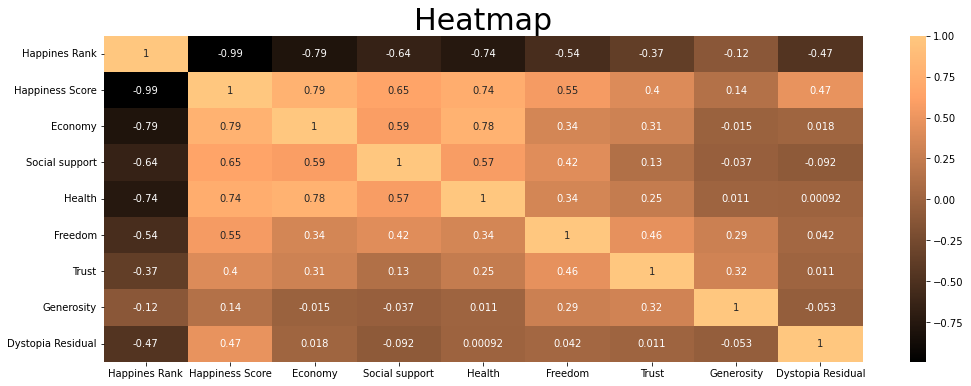

In [12]:

df.set_index('Year',inplace=True)
fig = plt.subplots(figsize = (17,6))
sns.heatmap(df.corr(),annot=True,cmap='copper')
plt.title("Heatmap", size=30)




As we can see in the heatmap the best predictors are gonna be, in order by correlation with the happines score:
-Economy(0.79);
-Health(0.74);
-Social support(0.65):
-freedom(0.55).
Let's check if those correlation changed in the period 2015-2019:

N.B. When we talk about correlation we will always refear to the correlation with happiness score and not happiness rank

Text(0.5, 1.0, 'Heatmap 2019')

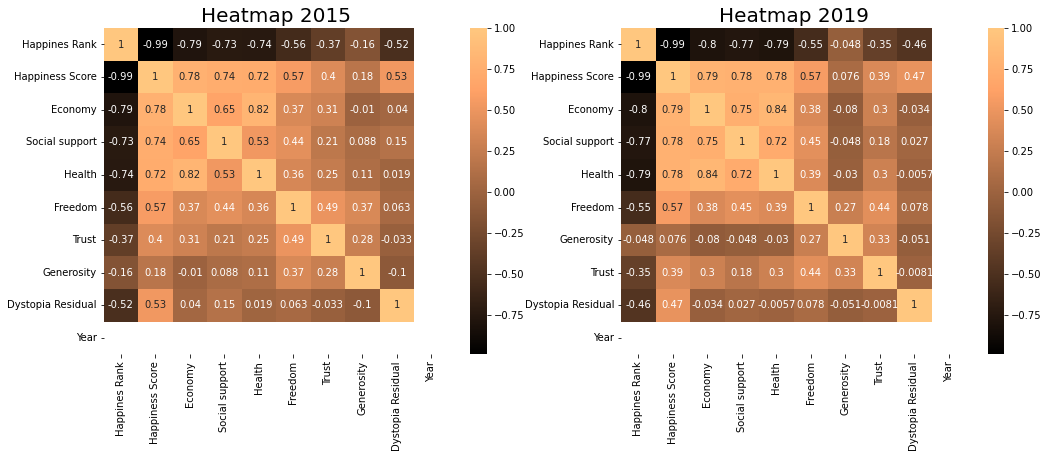

In [13]:


fig, (ax1, ax2) = plt.subplots(figsize = (17,6), ncols=2,sharey=False)

sns.heatmap(df2015.corr(),annot=True,cmap="copper",ax=ax1)
sns.heatmap(df2019.corr(),annot=True,cmap="copper",ax=ax2)
ax1.set_title("Heatmap 2015", size=20)
ax2.set_title("Heatmap 2019", size=20)


As we can see generosity correlation in the years dropped a lot, meaning that this variable have less linear relationship with the happines score than before, almost a 0 correlation in 2019.
Health and social support seem  to be slighty increased  their linear relationship  with the happiness, while economy remain the most corellated.
At the same time those last three are higly correlated between each other.





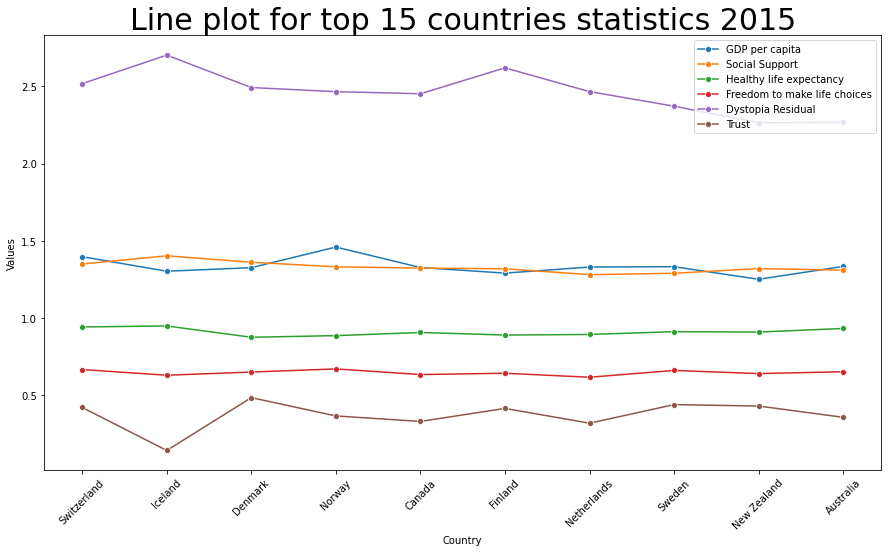

In [14]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df2015[:10],x="Country",y="Economy",marker='o',label='GDP per capita')
sns.lineplot(data=df2015[:10],x="Country",y="Social support",marker='o',label='Social Support')
sns.lineplot(data=df2015[:10],x="Country",y="Health",marker='o',label='Healthy life expectancy ')
sns.lineplot(data=df2015[:10],x="Country",y="Freedom",marker='o',label='Freedom to make life choices')
sns.lineplot(data=df2015[:10],x="Country",y="Dystopia Residual",marker='o',label="Dystopia Residual")
sns.lineplot(data=df2015[:10],x="Country",y="Trust",marker='o',label="Trust")



plt.xticks(rotation = 45)
plt.ylabel('Values')
plt.title('Line plot for top 15 countries statistics 2015', size=30)
plt.legend()
plt.show()

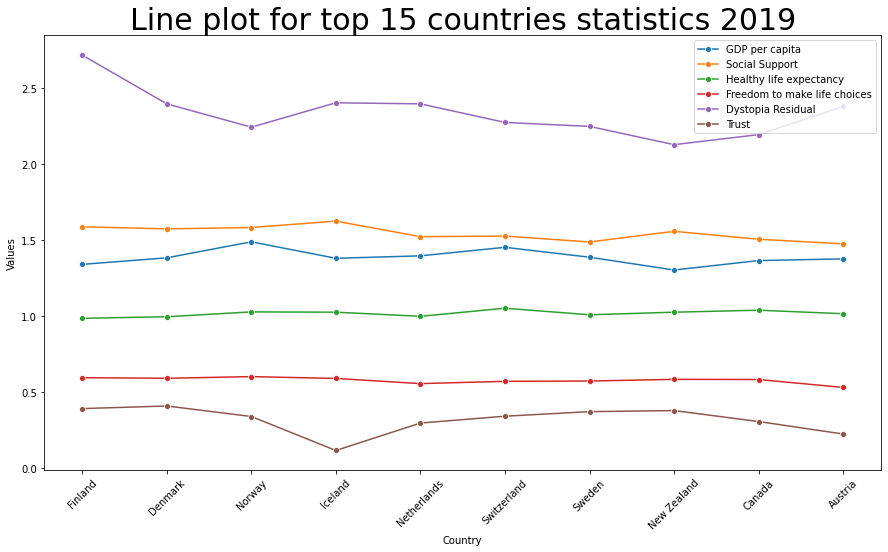

In [15]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df2019[:10],x="Country",y="Economy",marker='o',label='GDP per capita')
sns.lineplot(data=df2019[:10],x="Country",y="Social support",marker='o',label='Social Support')
sns.lineplot(data=df2019[:10],x="Country",y="Health",marker='o',label='Healthy life expectancy ')
sns.lineplot(data=df2019[:10],x="Country",y="Freedom",marker='o',label='Freedom to make life choices')
sns.lineplot(data=df2019[:10],x="Country",y="Dystopia Residual",marker='o',label="Dystopia Residual")
sns.lineplot(data=df2019[:10],x="Country",y="Trust",marker='o',label="Trust")
plt.xticks(rotation = 45)
plt.ylabel('Values')
plt.title('Line plot for top 15 countries statistics 2019',size=30)
plt.legend()
plt.show()

Here and in the next plots ill show even trust and dystopia just to have a better view even if i know those are less correlated with happiness score

The best country are really similar between them, they present the same pattern.
we can see thath the best countries in 2019 have improved the social support and the health in mean.
At the opposite the freedom to make life choices, the dystopia residual and the trust are slighty lowered.

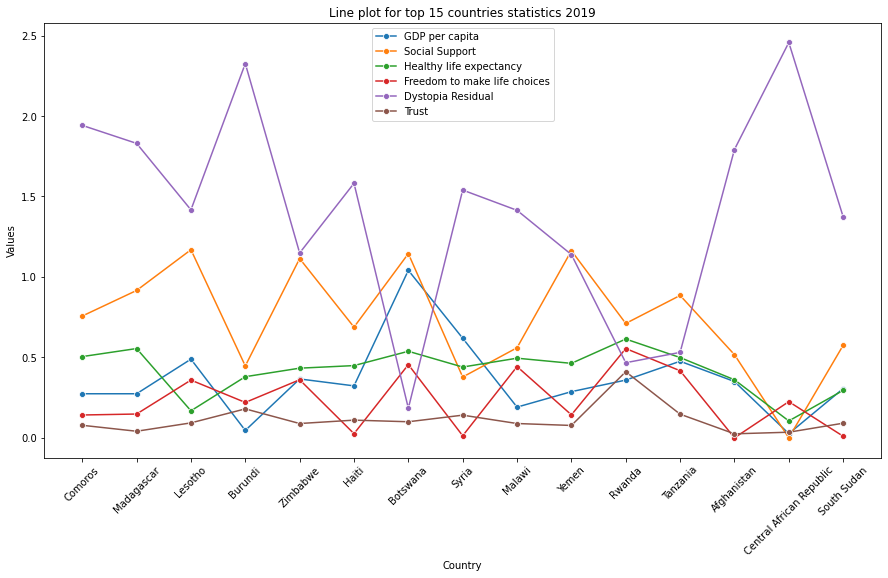

In [16]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df2019.tail(15),x="Country",y="Economy",marker='o',label='GDP per capita')
sns.lineplot(data=df2019.tail(15),x="Country",y="Social support",marker='o',label='Social Support')
sns.lineplot(data=df2019.tail(15),x="Country",y="Health",marker='o',label='Healthy life expectancy ')
sns.lineplot(data=df2019.tail(15),x="Country",y="Freedom",marker='o',label='Freedom to make life choices')
sns.lineplot(data=df2019.tail(15),x="Country",y="Dystopia Residual",marker='o',label="Dystopia Residual")
sns.lineplot(data=df2019.tail(15),x="Country",y="Trust",marker='o',label="Trust")
plt.xticks(rotation = 45)
plt.ylabel('Values')
plt.title('Line plot for top 15 countries statistics 2019')
plt.legend()
plt.show()

In the last 10 countries instead is really difficult to see a pattern to rely on, each country determines his happines score differtly, at a first approach. I didn't plot the 2019 because with this graph is not very useful to do a confrontation.

<a id='the_destination5'></a>
##  Top countries in increase and decrease of happiness score

In [17]:
#making a new variable as a difference between 2019 score and 2015 score
sub_df["Score_difference"] = 0


In [18]:
for i in range(len(sub_df)):
    sub_df["Score_difference"].iloc[i] = sub_df["Happiness Score_2019"].iloc[i] - sub_df["Happiness Score_2015"].iloc[i] 

In [19]:
#2 new dataframe 1 for the top and 1 for the bottom in happiness score difference
score_difference_top10 = sub_df.nlargest(10,"Score_difference")
score_difference_bottom10 = sub_df.nsmallest(10,"Score_difference")

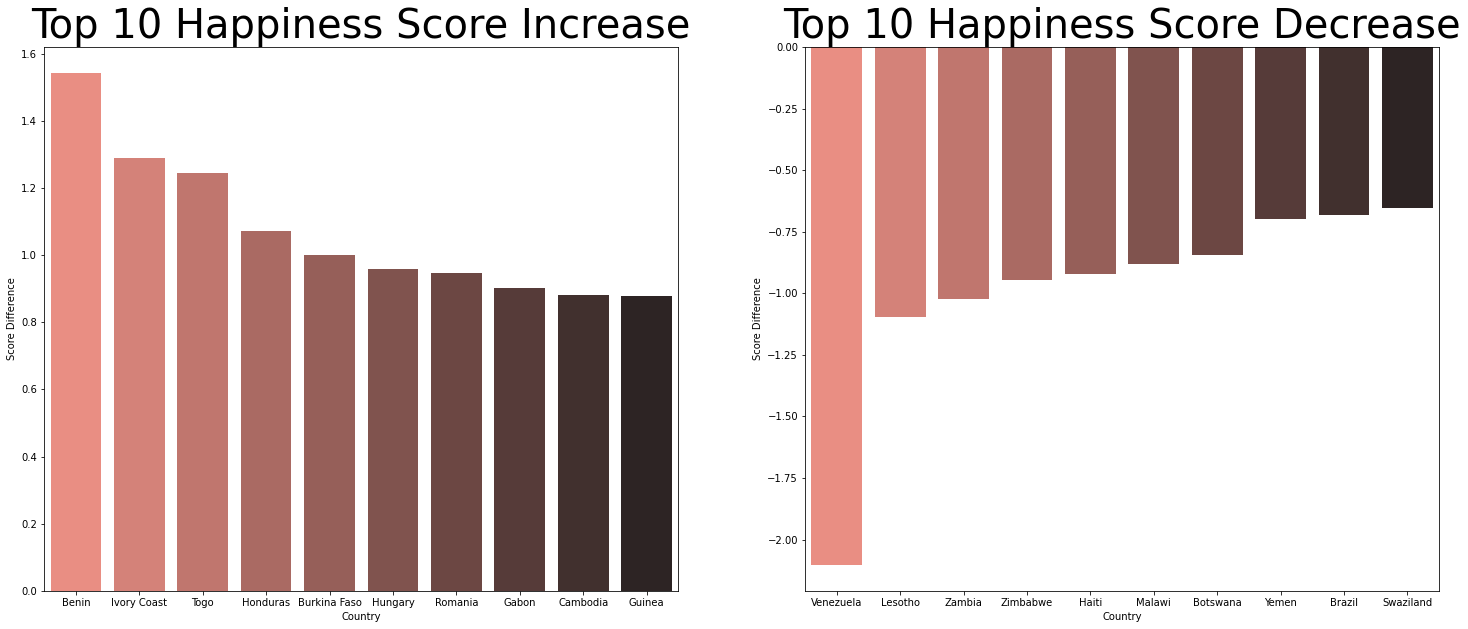

In [20]:
plt.figure(figsize = (25,10))
plt.subplot(1,2,1)
sns.barplot(x = "Country", y = "Score_difference", data = score_difference_top10, palette = "dark:salmon_r")
plt.ylabel("Score Difference")
plt.xlabel("Country")
plt.title("Top 10 Happiness Score Increase",size=40)

plt.subplot(1,2,2)
sns.barplot(x = "Country", y = "Score_difference", data = score_difference_bottom10, palette = "dark:salmon_r")
plt.ylabel("Score Difference")
plt.xlabel("Country")
plt.title("Top 10 Happiness Score Decrease",size=40)
plt.show()


In [21]:
#melting to make barplots
score_difference_top10_2015=pd.melt(score_difference_top10,id_vars= ['Country'] ,value_vars=["Economy_2015","Social support_2015","Health_2015","Freedom_2015","Health_2015","Trust_2015"])
score_difference_top10_2019=pd.melt(score_difference_top10,id_vars= ['Country'] ,value_vars=["Economy_2019","Social support_2019","Health_2019","Freedom_2019","Health_2019","Trust_2019"])

score_difference_top10_2015 = score_difference_top10_2015.reset_index()
score_difference_top10_2019= score_difference_top10_2019.reset_index()


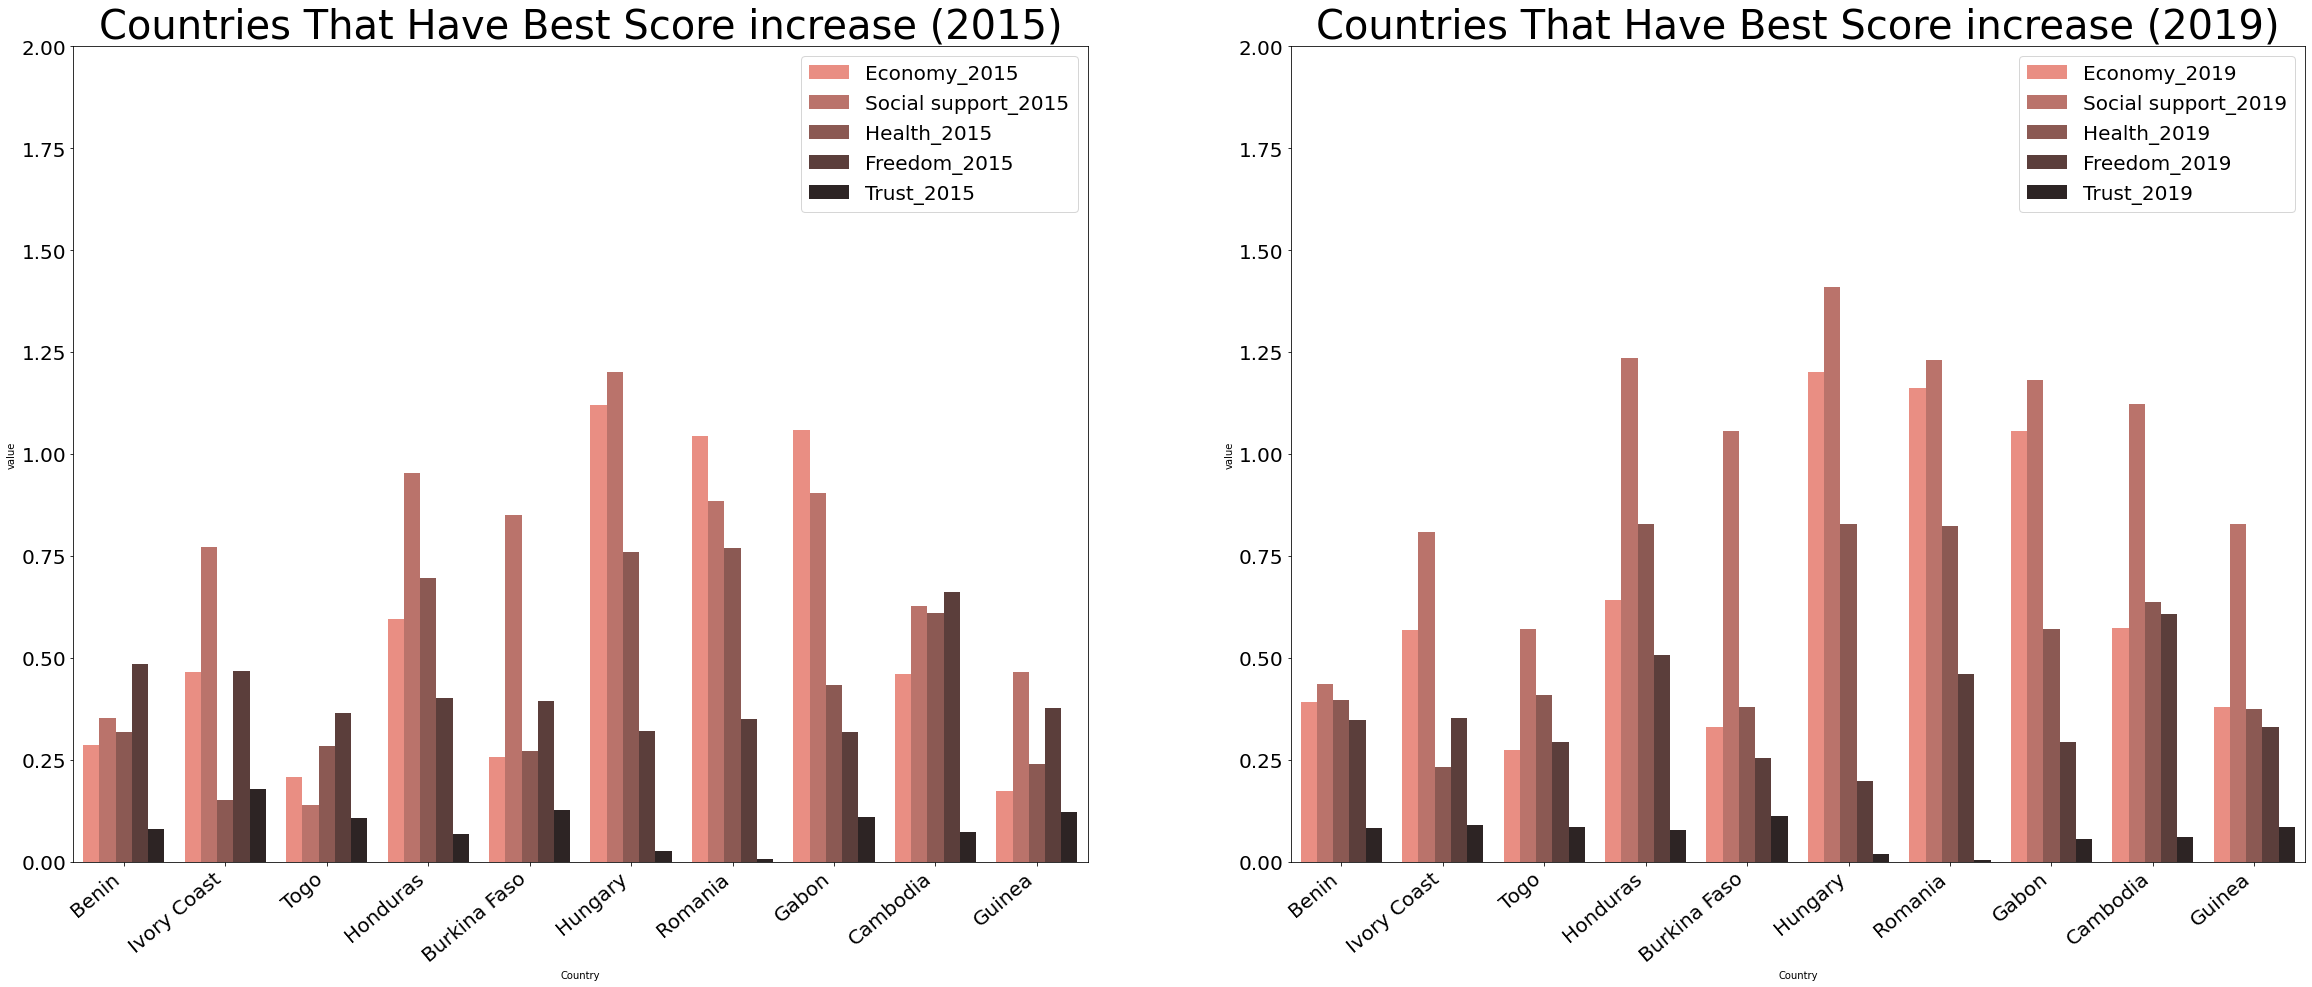

In [22]:
plt.figure(figsize = (40,15))
plt.subplot(1,2,1)
plt.ylim((0,2))
ax=sns.barplot(x='Country', y='value', hue='variable', data=score_difference_top10_2015 ,palette = "dark:salmon_r")
plt.title("Countries That Have Best Score increase (2015)",size=40)
plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.yticks( fontsize=20)
plt.xticks( fontsize=20)
plt.legend(fontsize=20)



plt.subplot(1,2,2)
plt.ylim((0,2))
ax=sns.barplot(x='Country', y='value', hue='variable', data=score_difference_top10_2019,palette = "dark:salmon_r")
plt.title("Countries That Have Best Score increase (2019)",size=40)
plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.yticks( fontsize=20)
plt.xticks( fontsize=20)
plt.legend(fontsize=20)

plt.show()

In [23]:

score_difference_bottom10_2015=pd.melt(score_difference_bottom10,id_vars= ['Country'] ,value_vars=["Economy_2015","Social support_2015","Health_2015","Freedom_2015","Health_2015","Trust_2015"])
score_difference_bottom10_2019=pd.melt(score_difference_bottom10,id_vars= ['Country'] ,value_vars=["Economy_2019","Social support_2019","Health_2019","Freedom_2019","Health_2019","Trust_2019"])
score_difference_bottom10_2015 = score_difference_bottom10_2015.reset_index()
score_difference_bottom10_2019= score_difference_bottom10_2019.reset_index()


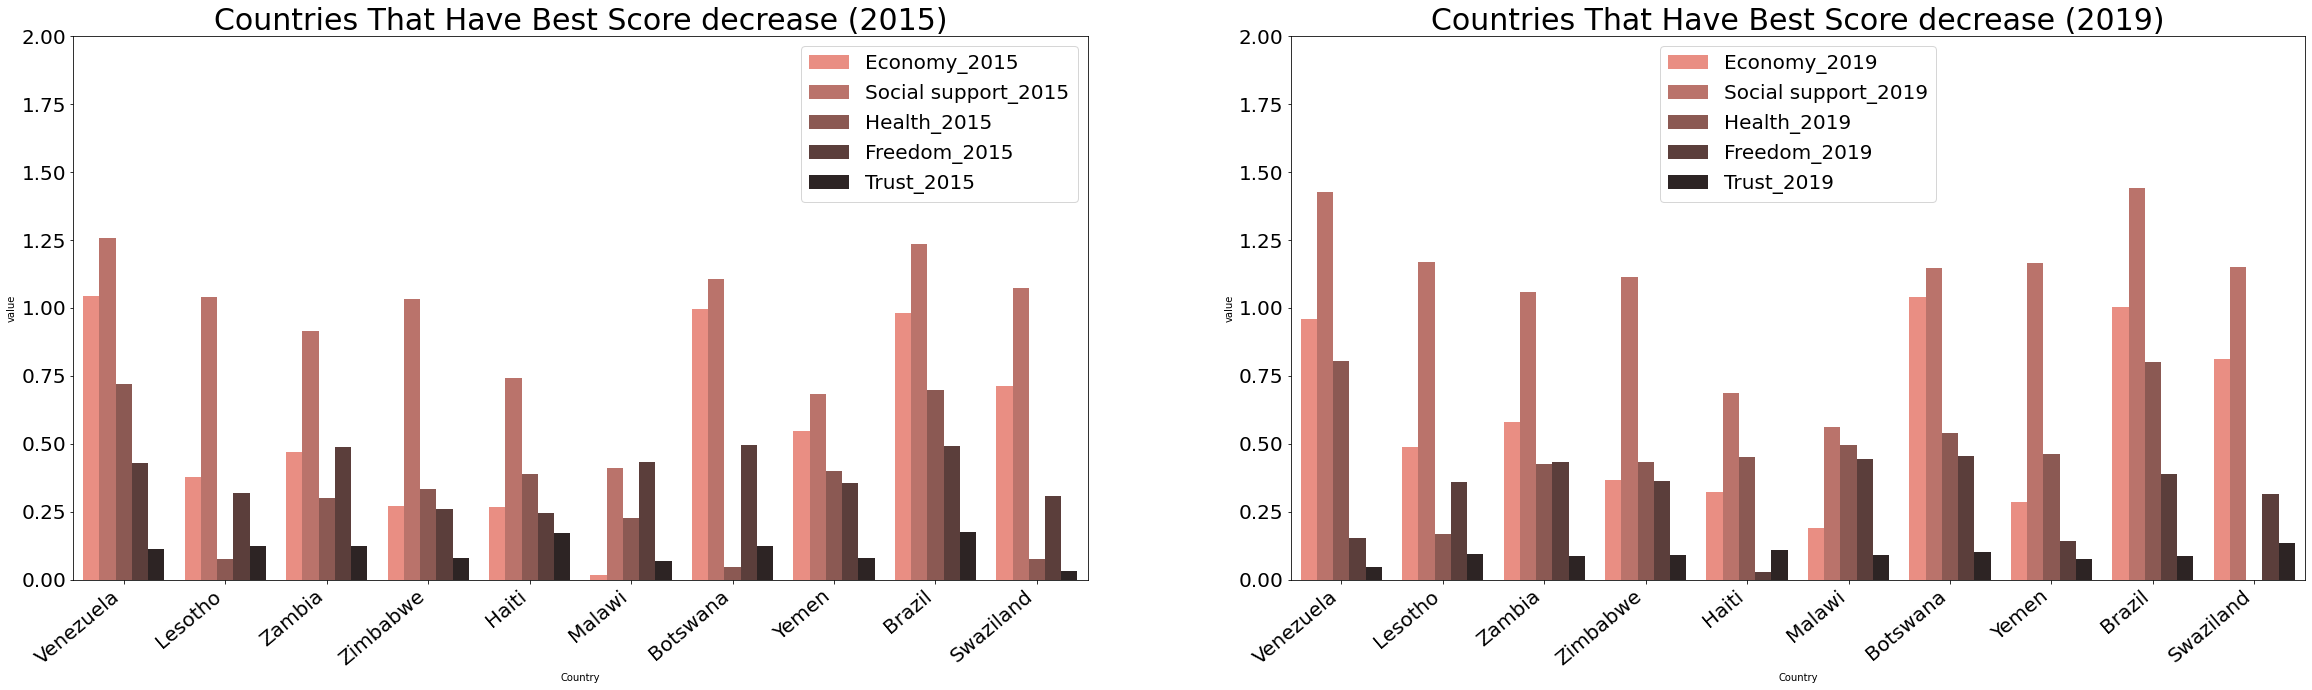

In [24]:
plt.figure(figsize = (40,10))
plt.subplot(1,2,1)
plt.ylim((0,2))
ax=sns.barplot(x='Country', y='value', hue='variable', data=score_difference_bottom10_2015 ,palette = "dark:salmon_r")
plt.title("Countries That Have Best Score decrease (2015)",size=30)

plt.yticks( fontsize=15)
plt.yticks( fontsize=20)
plt.xticks( fontsize=20)
plt.legend(fontsize=20)
plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')


plt.subplot(1,2,2)
plt.ylim((0,2))
ax=sns.barplot(x='Country', y='value', hue='variable', data=score_difference_bottom10_2019,palette = "dark:salmon_r")
plt.title("Countries That Have Best Score decrease (2019)",size=30)
plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.yticks( fontsize=20)
plt.xticks( fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [25]:
sub_df["Economy_difference"]=0
sub_df["Social support_difference"]=0
sub_df["Health_difference"]=0
sub_df["Freedom_difference"]=0
sub_df["Trust_difference"]=0
sub_df["Dystopia_difference"]=0

In [26]:
for i in range(len(sub_df)):
    sub_df["Economy_difference"].iloc[i] = sub_df["Economy_2019"].iloc[i] - sub_df["Economy_2015"].iloc[i]
    sub_df["Social support_difference"].iloc[i] = sub_df["Social support_2019"].iloc[i] - sub_df["Social support_2015"].iloc[i] 
    sub_df["Health_difference"].iloc[i] = sub_df["Health_2019"].iloc[i] - sub_df["Health_2015"].iloc[i] 
    sub_df["Freedom_difference"].iloc[i] = sub_df["Freedom_2019"].iloc[i] - sub_df["Freedom_2015"].iloc[i] 
    sub_df["Trust_difference"].iloc[i] = sub_df["Trust_2019"].iloc[i] - sub_df["Trust_2015"].iloc[i] 
    sub_df["Dystopia_difference"].iloc[i] = sub_df["Dystopia Residual_2019"].iloc[i] - sub_df["Dystopia Residual_2015"].iloc[i] 

In [27]:
score_difference_top = sub_df.nlargest(10,"Score_difference")
score_difference_bot = sub_df.nsmallest(10,"Score_difference")

In [28]:
score_difference1=pd.melt(score_difference_top,id_vars= ['Country'] ,value_vars=["Economy_difference","Social support_difference","Health_difference","Freedom_difference","Health_difference","Trust_2019"])
score_difference2=pd.melt(score_difference_bot,id_vars= ['Country'] ,value_vars=["Economy_difference","Social support_difference","Health_difference","Freedom_difference","Health_difference","Trust_2019"])
score_difference1 = score_difference1.reset_index()
score_difference2= score_difference2.reset_index()


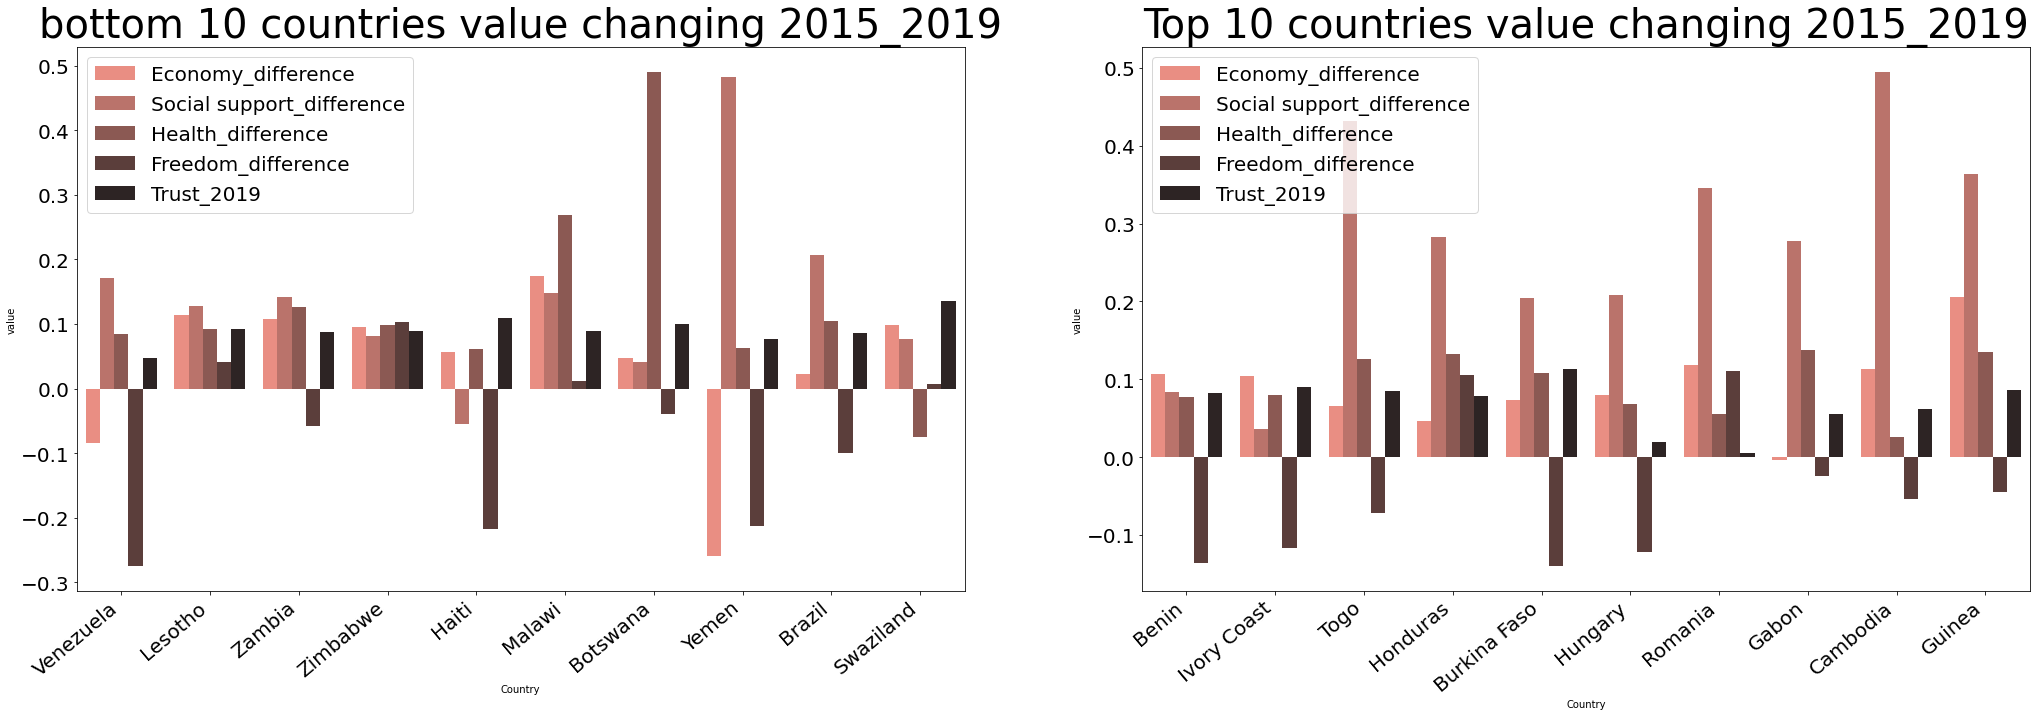

In [29]:
plt.figure(figsize = (35,10))
plt.subplot(1,2,1)
ax=sns.barplot(x='Country', y='value', hue='variable', data=score_difference2,palette = "dark:salmon_r")
plt.title("bottom 10 countries value changing 2015_2019", size=40)
plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.yticks( fontsize=20)
plt.xticks( fontsize=20)
plt.legend(fontsize=20)

plt.subplot(1,2,2)
ax=sns.barplot(x='Country', y='value', hue='variable', data=score_difference1,palette = "dark:salmon_r")
plt.title("Top 10 countries value changing 2015_2019", size=40)
plt.yticks( fontsize=20)
plt.xticks( fontsize=20)
plt.legend(fontsize=20)

plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.show()



I didnt plot the dystopia difference because of problem in visualization in this plot(its value was too big and my plot would have become unreadable), but in the bottom countries  (in encrase) was always high negative, while in the top countries(in encrase) always high positive

As we can see that the plot above, those countries that had the best increased in our period of interest,registered a good increase in all predictors except freedom.The best average increase concerns social support .
In the countries with the least increase in happiness, instead, we can see that the 60% decreased their health expectacy, in fact those countries have really poor economy, and health and economy are really corellated between each other.The last think to note is that dystopia in these sample behaves the other way around, in fact it increased in the best increasers and decreased in those that have gotten worse. 
we can say at the end of this visualization that the best discriminant is the social support.We can affirm that freedom is the indicator that behaves the same way for the happier and the less happy countries, going on in the years it decrease in the most of the countries

<a id='the_destination6'></a>
## Geographical discrimination of happiness

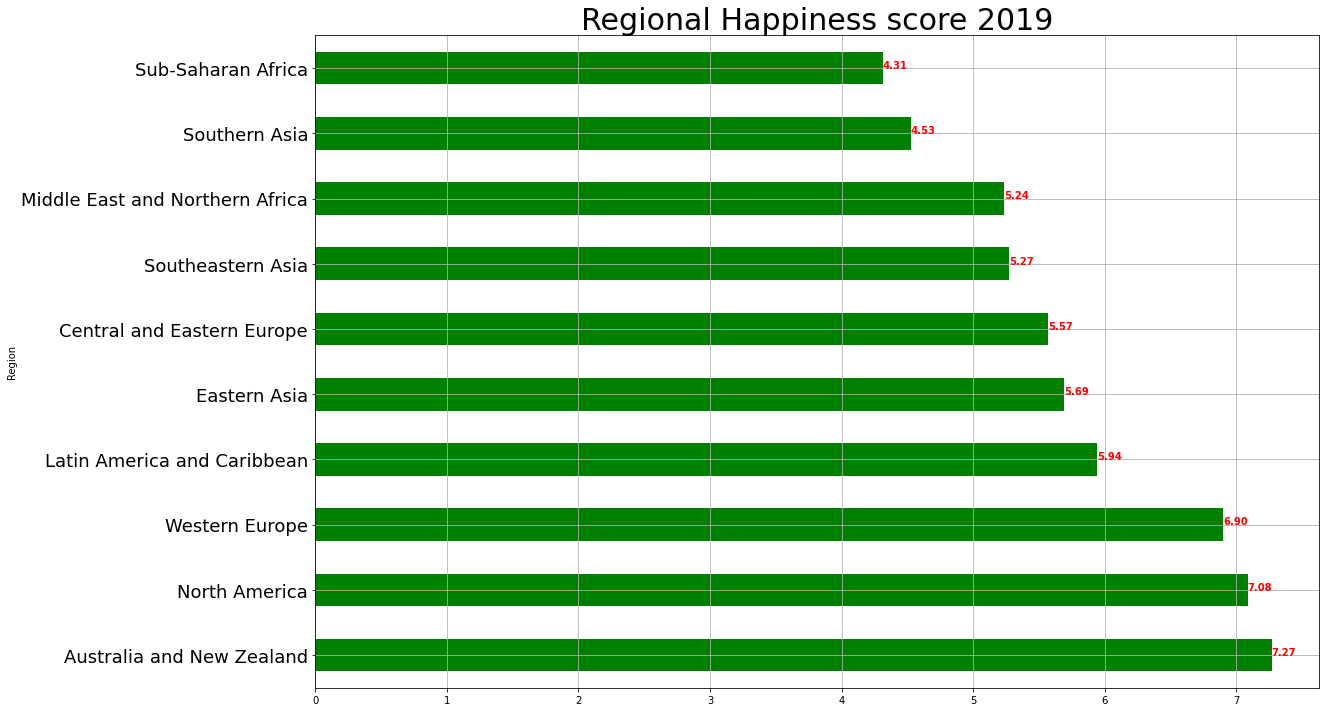

In [30]:
a=sub_df.groupby("Region")[["Happiness Score_2019"]].mean()
aa = a.apply(lambda x: x.sort_values(ascending=False))
aa.reset_index()
aa["Happiness Score_2019"].plot(kind='barh',
                                 figsize=(18,12),color="green")
for index, value in enumerate(aa["Happiness Score_2019"]):
    val = '{0:.2f}'.format(value)
    plt.text(value, index,
              str(val),color="red",weight='bold')
plt.title("Regional Happiness score 2019",fontsize=30)
plt.grid()
plt.yticks( fontsize=18)             
 
plt.show()

This is the absolute value at our last period of study, 2019. It seems like we have 3  bands. In the first we have Australia and new Zeland, North american and  Western Europe where happiness is perceived in a similar way.The second band,constituted by Latin American and Caribbean, Eastern Asia, Central and eastern Europa, Southestern Asia, Middle East and north Africa. The third band; Southern Asia and Sub-Saharan Africa. It's almost a economic discrimination at the first look (remembering the high correlation) except for asia and central and eastern Europe.

In [31]:
#a first group by that helps to make the three band 
first=sub_df.groupby("Region")[['Happiness Score_2019',
'Economy_2019',
'Social support_2019',
'Health_2019',
'Freedom_2019',
'Dystopia Residual_2019']].mean()
first = first.apply(lambda x: x.sort_values(ascending=False))
first=first.reset_index()


In [32]:


    #first band
first_band=first.loc[(first["Region"].isin(["Australia and New Zealand","North America","Western Europe"]))]
first_band=pd.melt(first_band, id_vars=['Region'], value_vars=[ 'Economy_2019',
'Social support_2019',
'Health_2019',
'Freedom_2019',
'Dystopia Residual_2019'])
first_band=first_band.round(decimals=2)

 #second band
second_band=first.loc[(first["Region"].isin(["Latin America and Caribbean","Eastern Asia",
                                     "Central and Eastern Europe","Southeastern Asia","	Middle East and Northern Africa	"]))]
second_band=pd.melt(second_band, id_vars=['Region'], value_vars=[ 'Economy_2019',
'Social support_2019',
'Health_2019',
'Freedom_2019',
'Dystopia Residual_2019'])
second_band=second_band.round(decimals=2)

#third band
third_band=first.loc[(first["Region"].isin(["Southern Asia","Sub-Saharan Africa"]))]
third_band=pd.melt(third_band, id_vars=['Region'], value_vars=[ 'Economy_2019',
'Social support_2019',
'Health_2019',
'Freedom_2019',
'Dystopia Residual_2019'])
third_band=third_band.round(decimals=2)


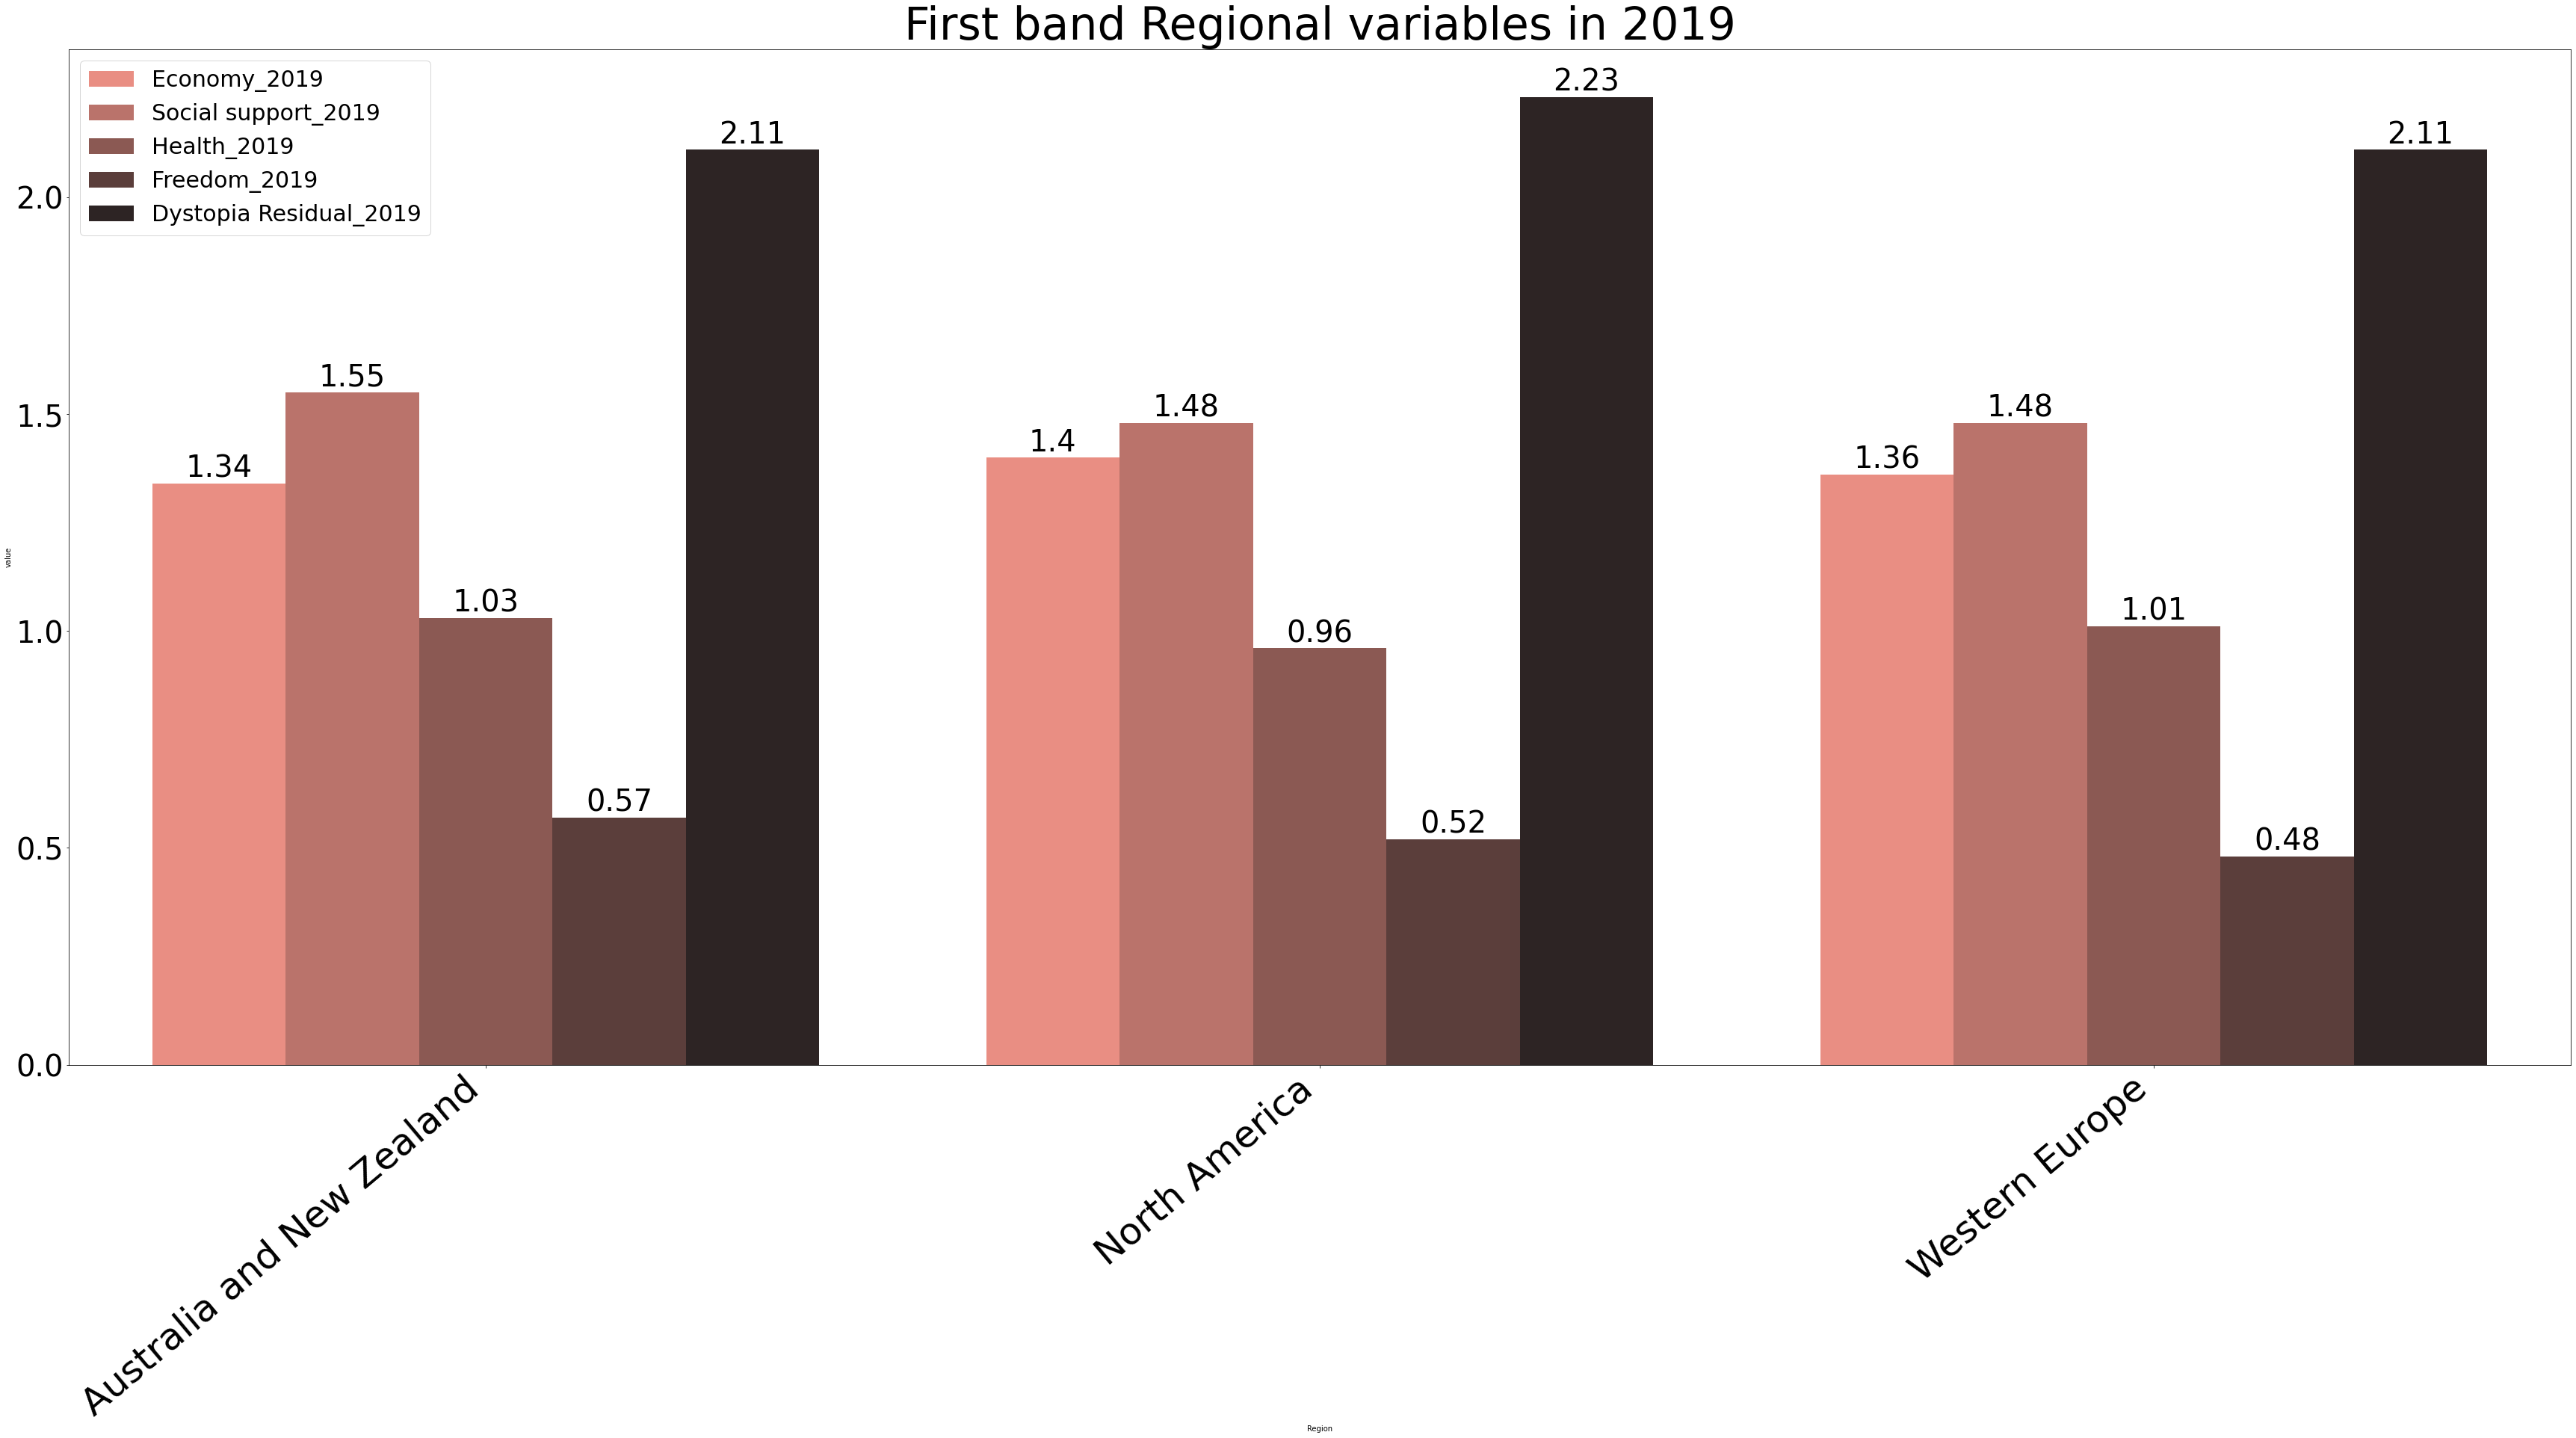

In [33]:
plt.figure(figsize = (60,25))
ax=sns.barplot(x='Region', y='value', hue='variable', data=first_band, palette="dark:salmon_r")

for container in ax.containers:
    first_band_hue = first_band.loc[first_band['variable']==container.get_label()]
    ax.bar_label(container, labels= first_band_hue["value"], size=40)
plt.title("First band Regional variables in 2019", size=60)
plt.yticks( fontsize=40)
plt.xticks( fontsize=50)
plt.legend(fontsize=30)

plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.show()



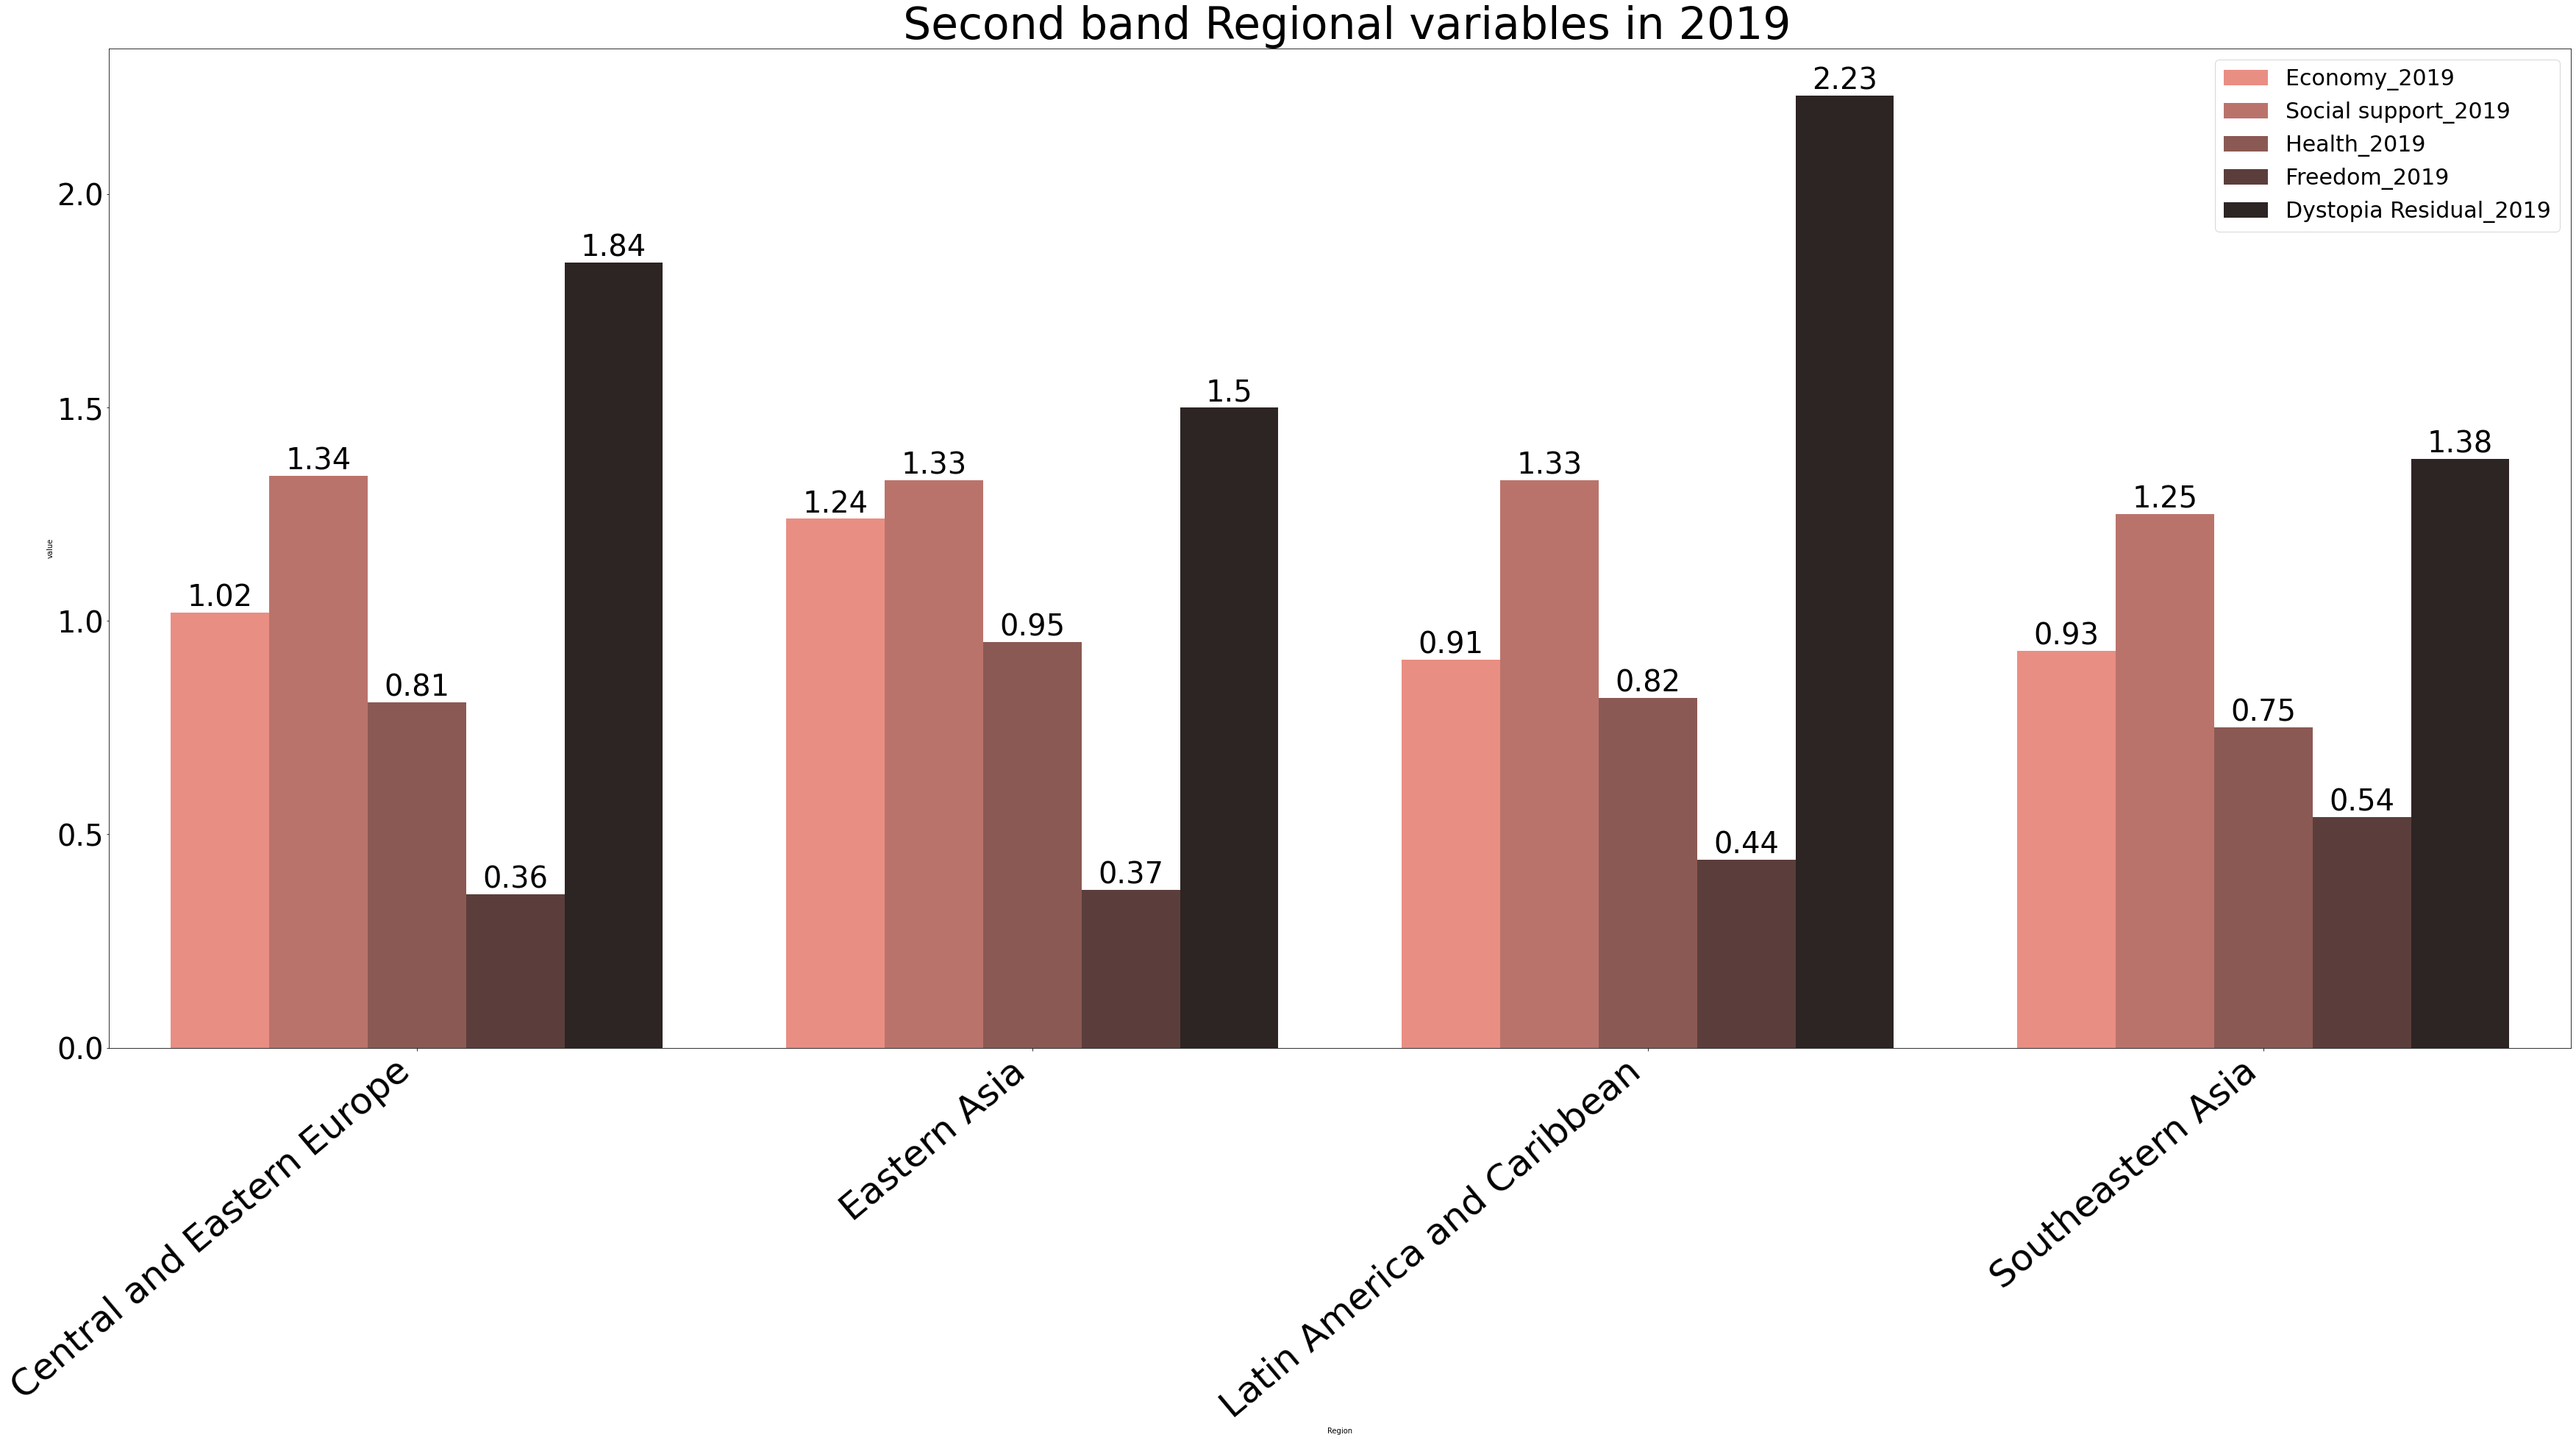

In [34]:
plt.figure(figsize = (60,25))
ax=sns.barplot(x='Region', y='value', hue='variable', data=second_band, palette="dark:salmon_r")

for container in ax.containers:
    second_band_hue = second_band.loc[second_band['variable']==container.get_label()]
    ax.bar_label(container, labels= second_band_hue["value"], size=40)
plt.title(" Second band Regional variables in 2019", size=60)
plt.yticks( fontsize=40)
plt.xticks( fontsize=50)
plt.legend(fontsize=30)

plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.show()



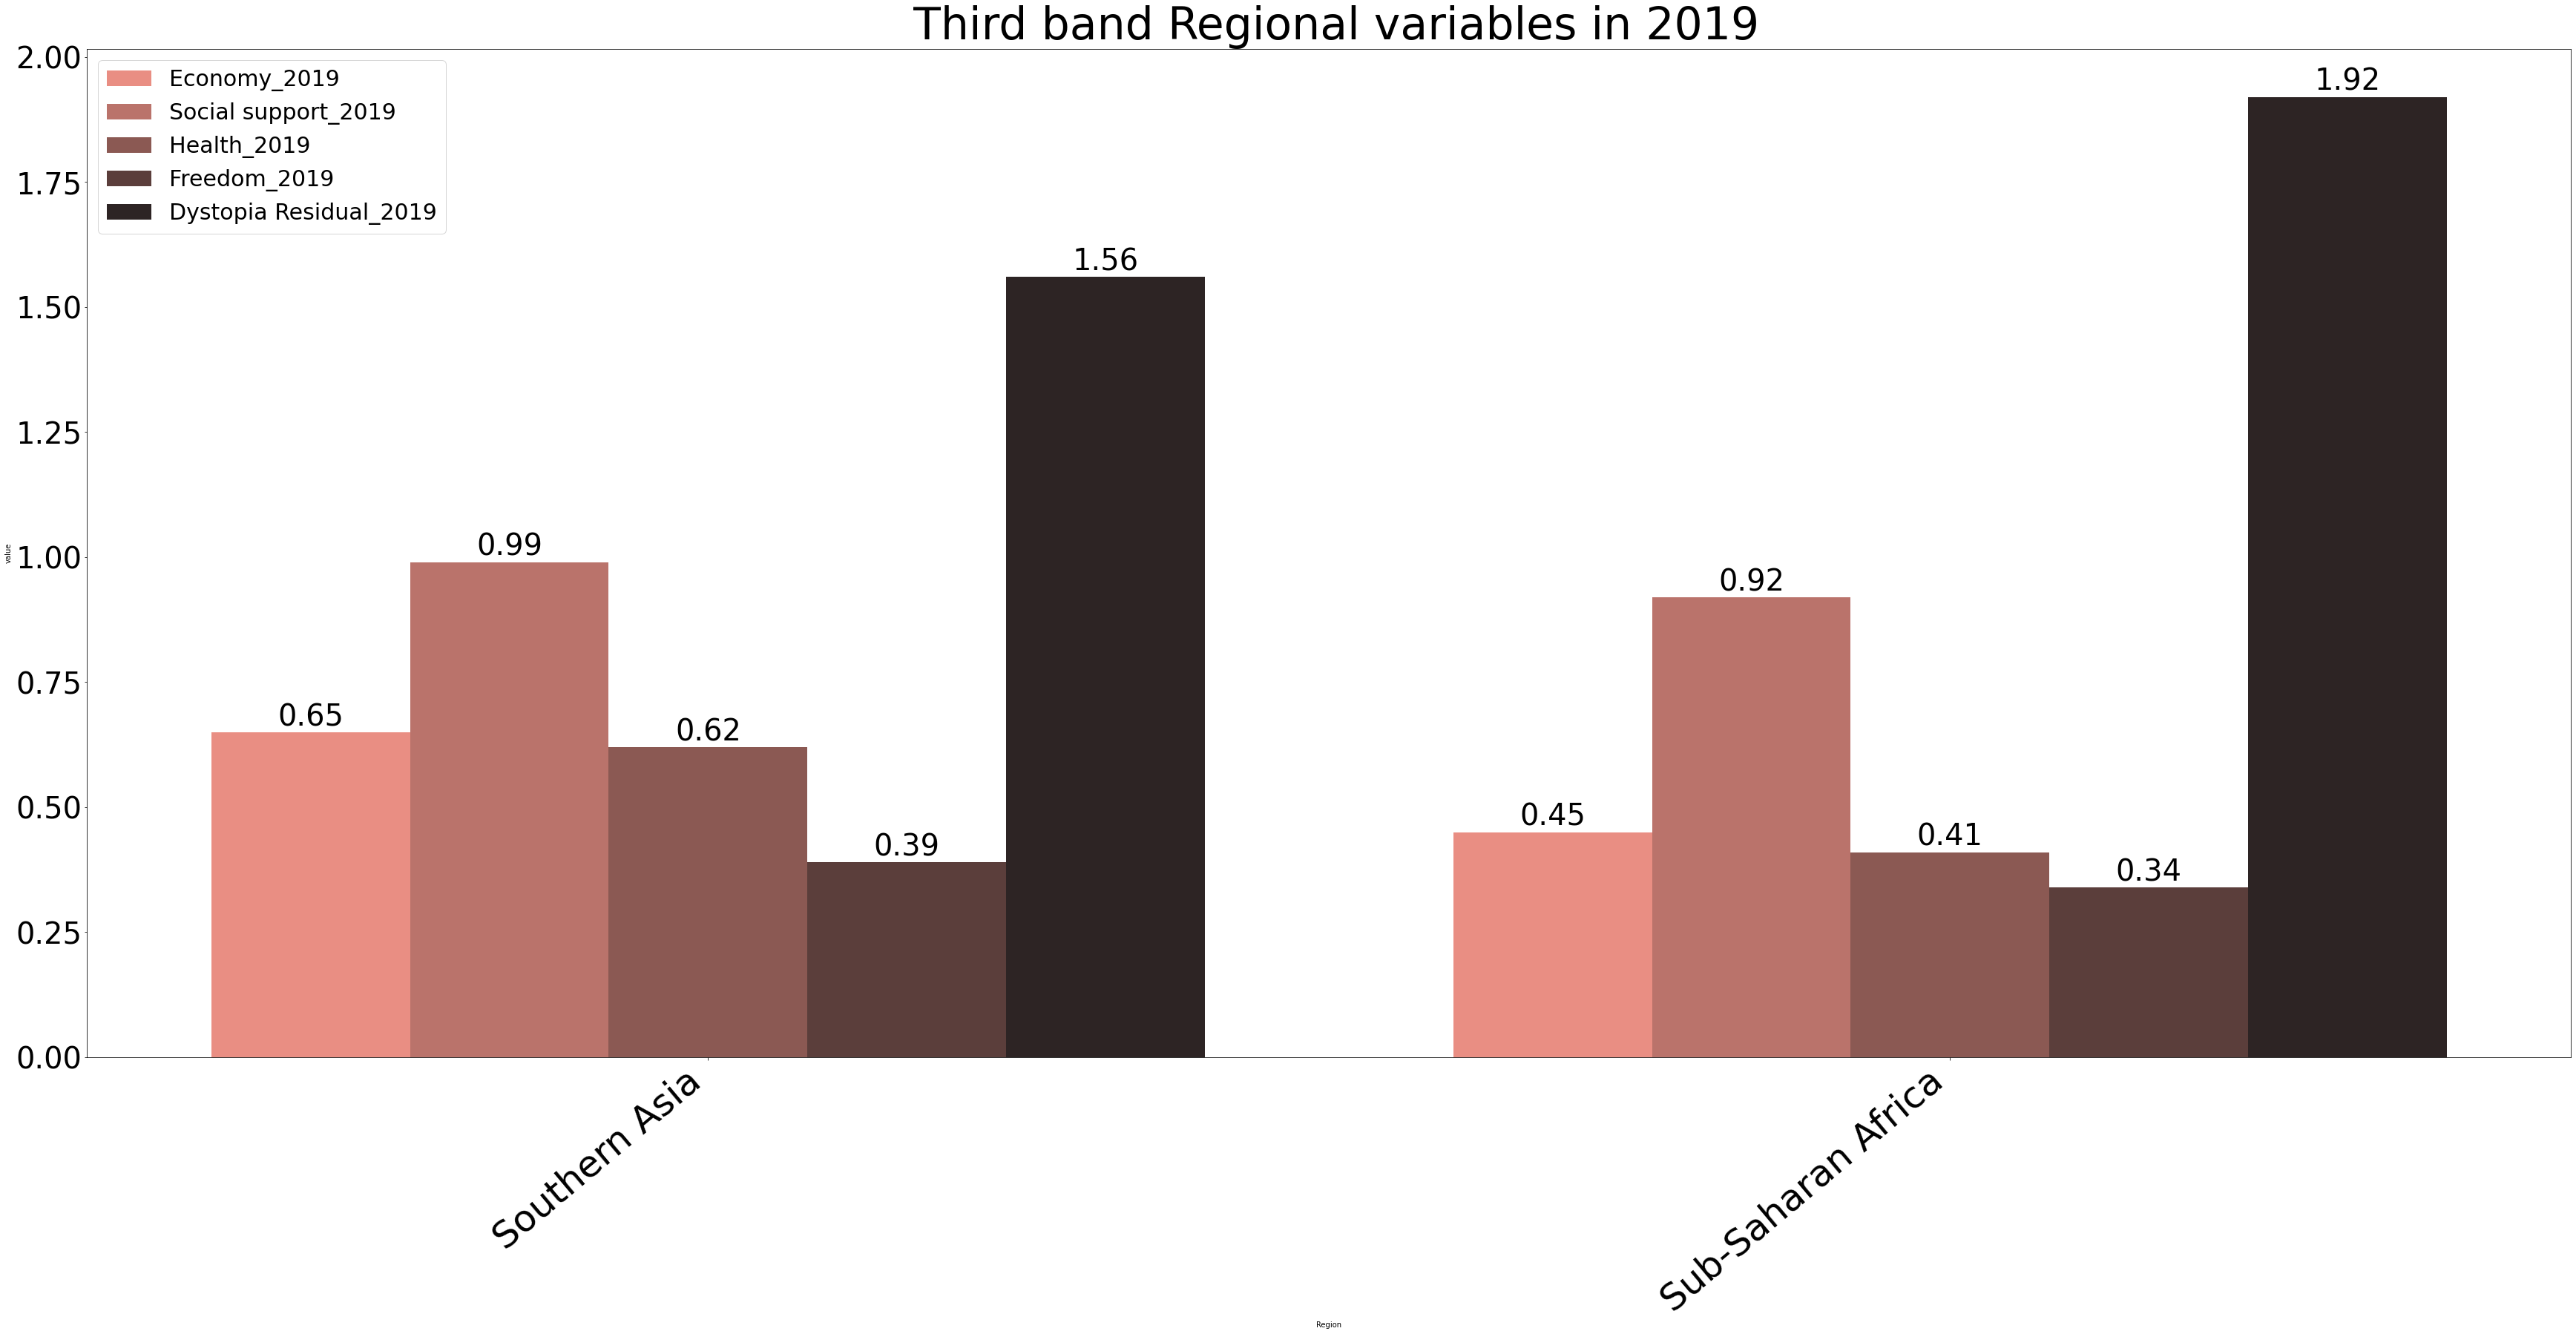

In [35]:
plt.figure(figsize = (60,25))
ax=sns.barplot(x='Region', y='value', hue='variable', data=third_band, palette="dark:salmon_r")

for container in ax.containers:
    third_band_hue = third_band.loc[third_band['variable']==container.get_label()]
    ax.bar_label(container, labels= third_band_hue["value"], size=40)
plt.title(" Third band Regional variables in 2019", size=60)
plt.yticks( fontsize=40)
plt.xticks( fontsize=50)
plt.legend(fontsize=30)

plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.show()



That division in 3 bands was a good division, in each bands the regions are really similar between them, we could even create a categorical variable from this in future.From the graphs above we can see the pattern of improvement that identify each bands.

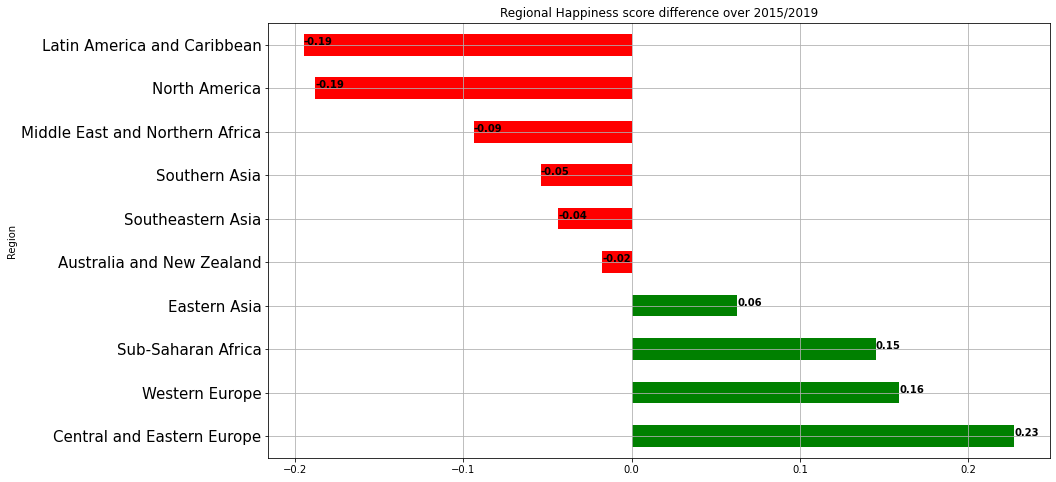

In [36]:
sc_diff=sub_df.groupby("Region")[["Score_difference"]].mean()
sc_diff = sc_diff.apply(lambda x: x.sort_values(ascending=False))
sc_diff.reset_index()

sc_diff["Score_difference"].plot(kind='barh',title="Regional Happiness score difference over 2015/2019",
                    figsize=(14,8),
                    color=(sc_diff["Score_difference"] > 0).map({True: 'g',
                                                    False: 'r'}))
for index, value in enumerate(sc_diff["Score_difference"]):
    val = '{0:.2f}'.format(value)
    plt.text(value, index,
              str(val),color="black",weight='bold')
plt.yticks( fontsize=15)
plt.grid()

             
 
plt.show()

we can see that the american part had the greater decrease, a very high one, while the european continent had the best increase in happiness(always a high one ) in mean. Asia and africa are less homogeneous maybe because of the  different culture among them. While the absolute best continet, Australian and new zealand remained almost the same in terms of average values. flaggggggg

In [37]:
#sub_df for all difference
multi_diff=sub_df.groupby("Region")[["Economy_difference","Social support_difference","Health_difference",
                       "Freedom_difference","Dystopia_difference"]].mean()
multi_diff = multi_diff.apply(lambda x: x.sort_values(ascending=False))
multi_diff=multi_diff.reset_index()








In [38]:
score_difference_fin=pd.melt(multi_diff,id_vars= ['Region'] ,value_vars=["Economy_difference","Social support_difference","Health_difference","Freedom_difference","Dystopia_difference"])
score_difference_fin=score_difference_fin.round(decimals=2) #i rounded to have a better view in plot

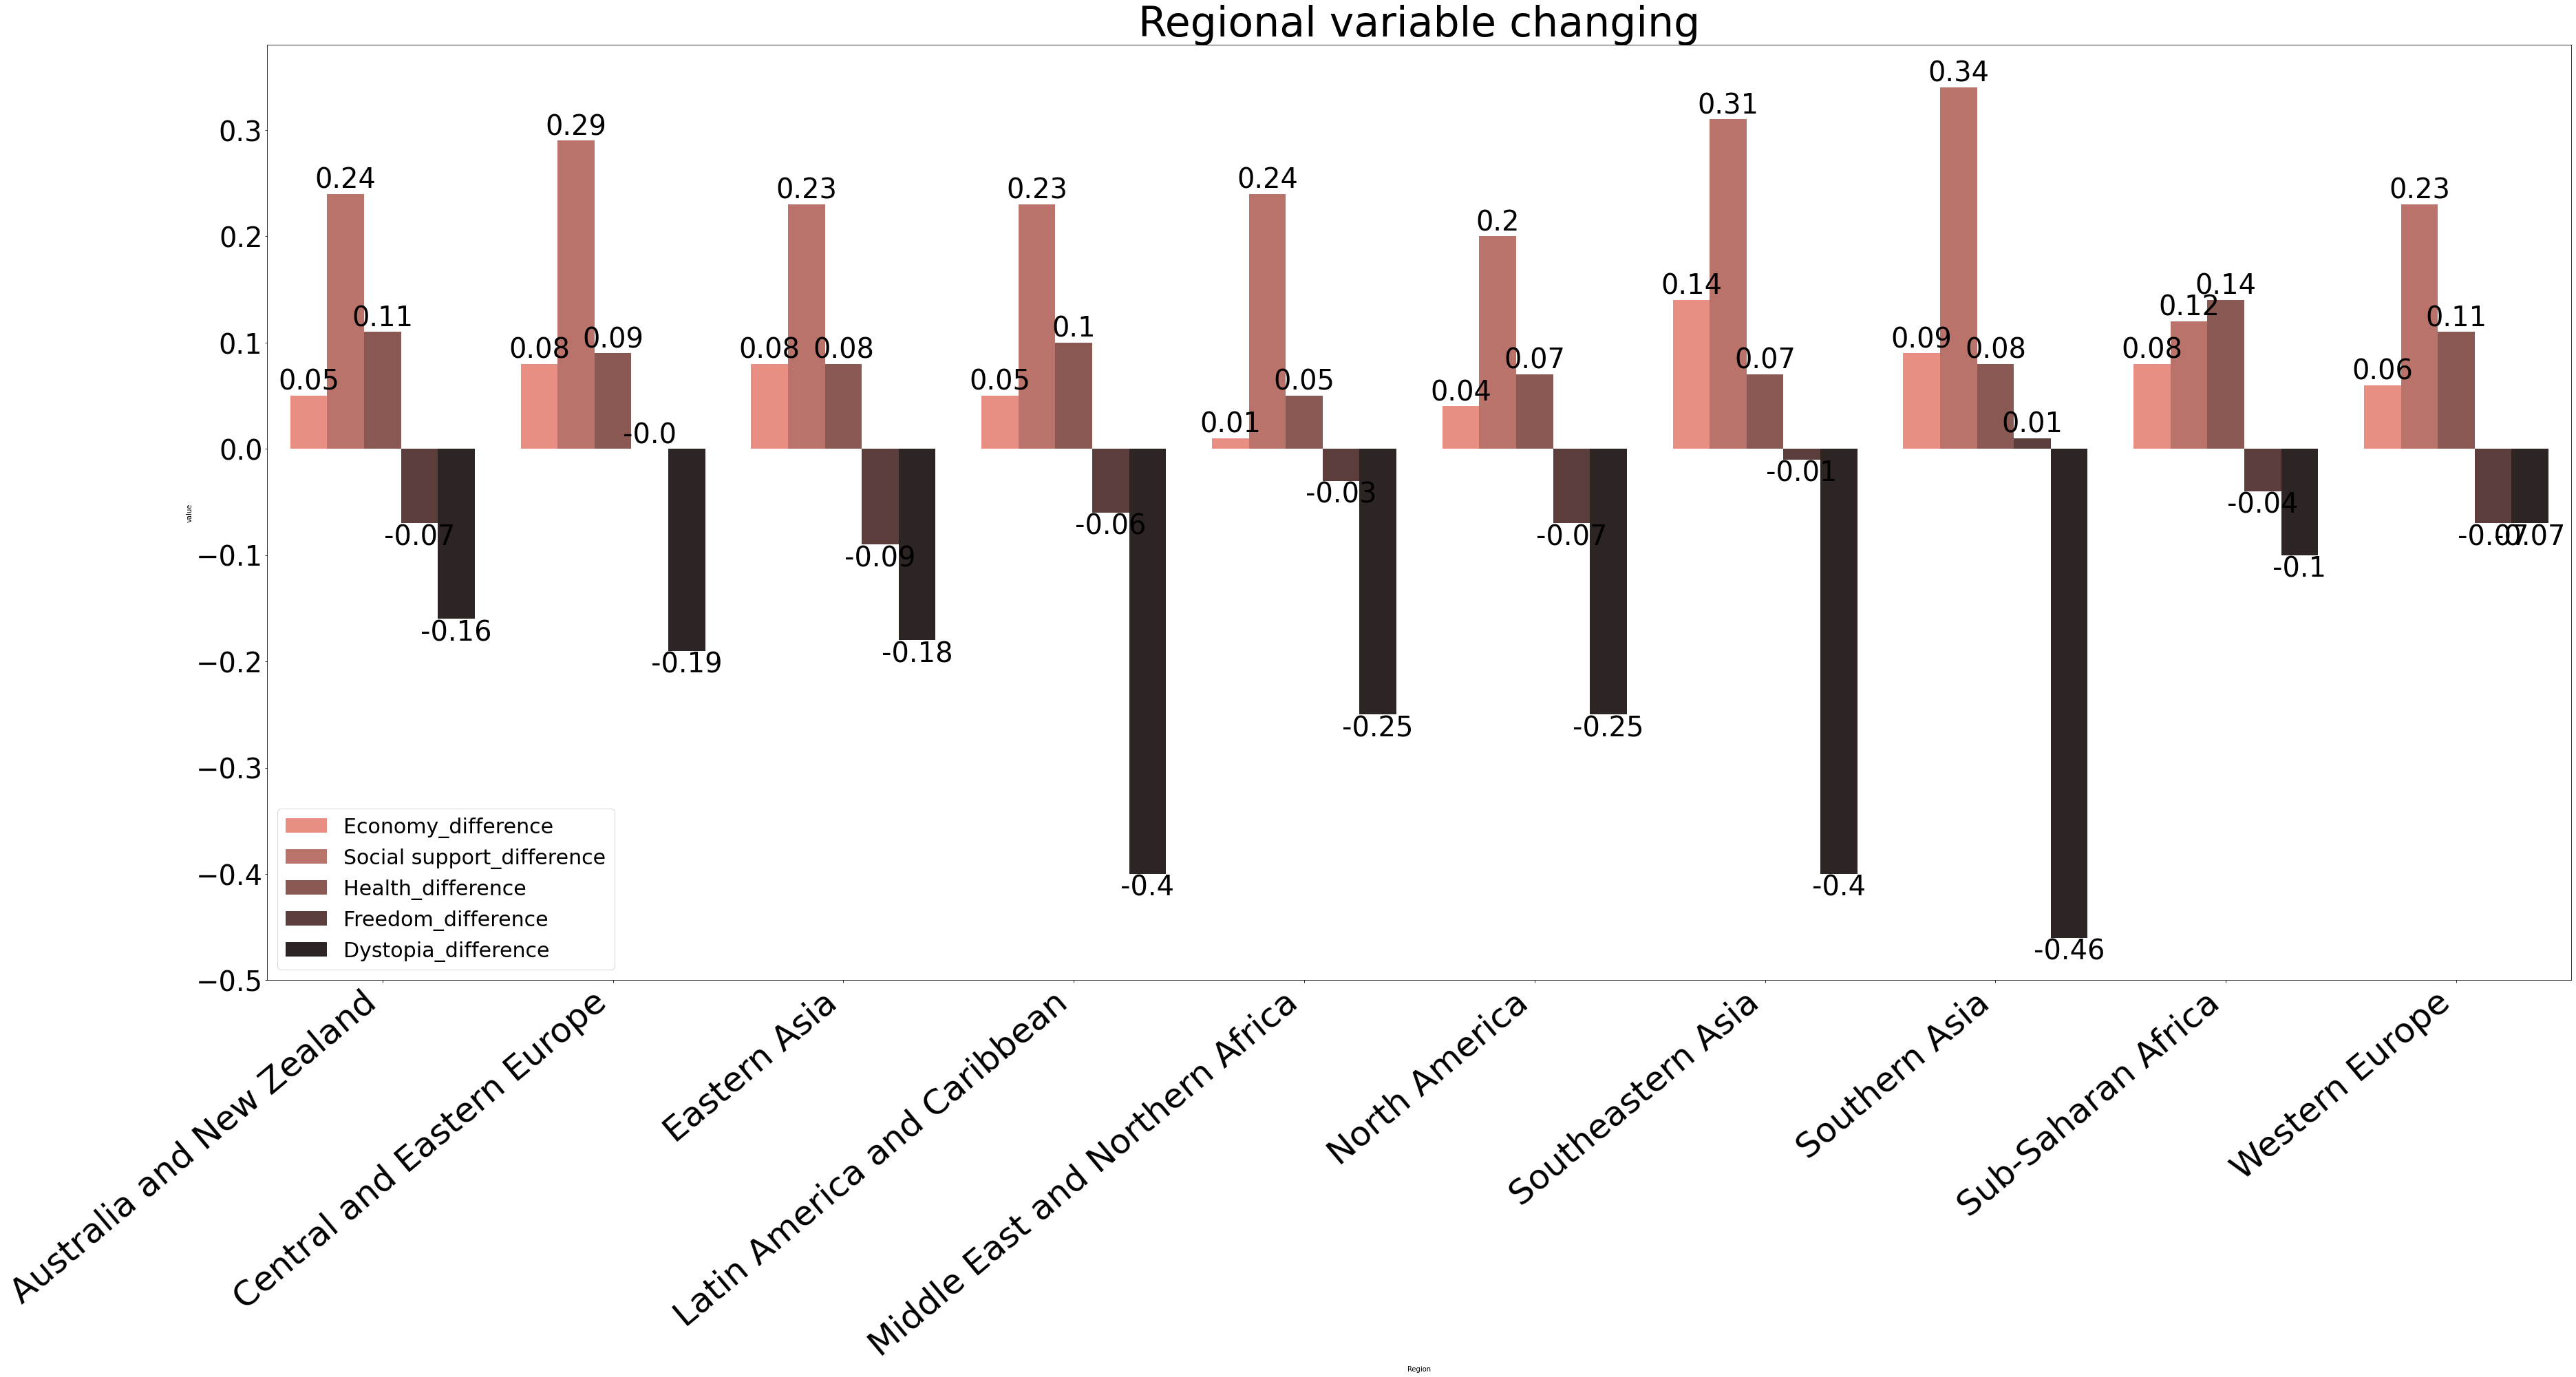

In [39]:
plt.figure(figsize = (60,25))
ax=sns.barplot(x='Region', y='value', hue='variable', data=score_difference_fin, palette="dark:salmon_r")

for container in ax.containers:
    score_difference_fin_hue = score_difference_fin.loc[score_difference_fin['variable']==container.get_label()]
    ax.bar_label(container, labels= score_difference_fin_hue["value"], size=40)
plt.title("Regional variable changing", size=60)
plt.yticks( fontsize=40)
plt.xticks( fontsize=50)
plt.legend(fontsize=30)

plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.show()



Looking at the window above we can finally have a better view about the variabiles changing in each region. They are sorted by the best region increase untill the worste region increase.

<a id='the_destination13'></a>
# Second part, Freedom

Freedom headers
<ol>
<li><a href='#the_destination8'>Import and Used dateset's data explain '</a></li>
<li><a href='#the_destination9'>Processing data</a></li>
<li><a href='#the_destination10'>Plotting data'</a></li>
<li><a href='#the_destination11'>Top countries in increase and decrease of happiness score'</a></li>
<li><a href='#the_destination12'>Geoghrapical discrimination'</a></li>

Our goal is to see what we intend for  freedom, and not how our perception of freedom changed over years, so we will just use our last year, the 2019

<a id='the_destination8'></a>
## Import and used dataset's data explain

About this file
Column encodings:
The prefix hf corresponds to overall Human Freedom ratings/rankings.
The prefix pf corresponds to Personal Freedom ratings/rankings.
The prefix ef corresponds to Economic Freedom ratings/rankings.
Underscores (_) indicate wether the indicator is a main category or a subcategory. For example, pf_rol is the Rule of Law category in Personal Freedom. pf_rol_procedural refers to Procedural Justice, which is a subcategory in the Rule of Law category.

In [40]:
dd2021 = pd.read_csv("../kaggle/hfi_cc_2021.csv")

In [41]:
dd2021=dd2021[dd2021["year"]>2018]

<a id='the_destination9'></a>
## Processing data

In [42]:
#checking for nan
null_count_ser = pd.isnull(dd2021).sum()
is_null_ser = null_count_ser > 0
null_count_ser[is_null_ser]

pf_rol_procedural                    46
pf_rol_civil                         46
pf_rol_criminal                      46
pf_ss_homicide                        2
pf_ss_disappearances_disap            3
                                     ..
ef_regulation_labor_dismissal         3
ef_regulation_business_adm           17
ef_regulation_business_bribes         3
ef_regulation_business_licensing      4
ef_regulation_business_compliance     1
Length: 64, dtype: int64

In [43]:
#replacing nan values with the mode
dd2021 = dd2021.fillna(dd2021.mode().iloc[0])

In [44]:
dd2021

,year,countries,ISO,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2019,Albania,ALB,Eastern Europe,8.14,43.0,2.0,5.97,4.76,4.26,...,5.65,6.67,9.74,6.24,5.62,7.18,6.85,7.70,7.81,31.0
1,2019,Algeria,DZA,Middle East & North Africa,5.26,154.0,4.0,5.21,5.64,4.35,...,4.22,2.22,9.31,2.58,8.77,7.03,5.69,5.84,4.90,162.0
2,2019,Angola,AGO,Sub-Saharan Africa,6.09,129.0,4.0,2.72,4.43,3.60,...,2.94,2.44,8.73,4.70,7.92,6.78,5.59,5.97,5.50,153.0
3,2019,Argentina,ARG,Latin America & the Caribbean,7.38,74.0,2.0,6.83,5.94,4.35,...,2.71,5.78,9.58,6.53,5.73,6.51,6.14,5.99,5.50,153.0
4,2019,Armenia,ARM,Caucasus & Central Asia,8.20,40.0,1.0,2.44,5.37,3.55,...,5.17,5.56,9.86,6.96,9.30,7.04,7.32,7.82,8.03,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2019,"Venezuela, RB",VEN,Latin America & the Caribbean,4.03,164.0,4.0,1.00,2.74,1.29,...,1.28,0.00,4.44,1.15,4.98,0.00,1.98,2.52,2.83,165.0
161,2019,Vietnam,VNM,South Asia,5.90,134.0,4.0,4.57,4.63,4.59,...,3.98,6.00,9.43,4.39,8.21,5.70,6.28,6.98,6.26,126.0
162,2019,"Yemen, Rep.",YEM,Middle East & North Africa,4.08,163.0,4.0,2.44,5.37,3.55,...,2.94,0.00,8.28,0.94,8.68,7.22,3.88,3.50,5.45,155.0
163,2019,Zambia,ZMB,Sub-Saharan Africa,6.82,102.0,3.0,3.28,4.69,4.08,...,4.22,3.11,9.37,4.73,7.85,8.23,6.25,6.46,7.09,80.0


In [45]:
#checking again for nan
null_count_ser = pd.isnull(dd2021).sum()
is_null_ser = null_count_ser > 0
null_count_ser[is_null_ser]

pf_identity_inheritance_widows       165
pf_identity_inheritance_daughters    165
dtype: int64

In [46]:
#dropping the only 2 columns full of nan values and iso

dd2021.drop(columns=["pf_identity_inheritance_widows","pf_identity_inheritance_daughters",'ISO'],
            inplace=True, axis=1)

In [47]:
null_count_ser = pd.isnull(dd2021).sum()
is_null_ser = null_count_ser > 0
null_count_ser[is_null_ser]

Series([], dtype: int64)

In [48]:
lean_df = pd.DataFrame() # creating a empty dataset

lean_df["hf_score"] = dd2021.hf_score                # Human Freedom Score
lean_df["pf_score"] = dd2021.pf_score                # Personal freedom score
lean_df["pf_womens"] = dd2021.pf_womens              # Womens
lean_df["pf_rol"] =dd2021.pf_rol                     # Rule Of Law
lean_df["pf_ss"] = dd2021.pf_ss                      # Security and Safety
lean_df["pf_movement"] = dd2021.pf_movement          # Movement
lean_df["pf_religion"] = dd2021.pf_religion          # Religion
lean_df["pf_assembly"] = dd2021.pf_assembly          # Association, Assembly, and Civil Society
lean_df["pf_expression"] = dd2021.pf_expression      # Expression and Information
lean_df["pf_identity"] = dd2021.pf_identity          # Identity and Relationships
lean_df["ef_government"] = dd2021.ef_government      # Size of Government
lean_df["ef_legal"] = dd2021.ef_legal                # Legal System and Property Rights
lean_df["ef_money"] = dd2021.ef_money                # Access to Sound Money
lean_df["ef_trade"] = dd2021.ef_trade                # Freedom to Trade Internationally
lean_df["ef_regulation"] = dd2021.ef_regulation      # Regulation of Credit, Labor, and Business
lean_df["ef_regulation"] = dd2021.ef_regulation 

lean_df["countries"] = dd2021.countries              # Name of the Country
lean_df["ef_score"] = dd2021.ef_score                # Economical Freedom Score
lean_df["year"] = dd2021.year                        # Year of Observation


In [49]:
lean_df

,hf_score,pf_score,pf_womens,pf_rol,pf_ss,pf_movement,pf_religion,pf_assembly,pf_expression,pf_identity,ef_government,ef_legal,ef_money,ef_trade,ef_regulation,countries,ef_score,year
0,8.14,8.38,8.97,5.00,9.34,9.87,9.74,9.05,6.91,8.75,8.00,5.26,9.86,8.23,7.70,Albania,7.81,2019
1,5.26,5.51,3.78,5.07,8.95,6.76,5.45,4.75,5.11,2.50,4.62,4.14,7.34,2.55,5.84,Algeria,4.90,2019
2,6.09,6.50,7.75,3.58,8.46,8.03,6.95,5.75,6.51,6.25,7.53,3.67,4.93,5.39,5.97,Angola,5.50,2019
3,7.38,8.73,9.93,5.71,8.38,9.76,9.86,9.03,8.40,10.00,6.26,4.80,4.00,6.42,5.99,Argentina,5.50,2019
4,8.20,8.32,8.95,4.98,9.38,9.84,8.55,8.90,7.88,8.75,7.83,6.30,9.65,8.53,7.82,Armenia,8.03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,4.03,4.90,8.17,1.68,3.37,5.85,7.23,3.83,4.20,8.13,4.34,2.49,0.69,4.09,2.52,"Venezuela, RB",2.83,2019
161,5.90,5.63,8.83,4.60,9.13,6.63,4.71,2.29,3.35,8.75,6.37,4.98,6.79,6.18,6.98,Vietnam,6.26,2019
162,4.08,3.11,2.26,2.41,4.21,4.13,2.93,3.45,2.57,2.04,7.83,2.74,7.78,5.38,3.50,"Yemen, Rep.",5.45,2019
163,6.82,6.62,6.33,4.02,8.53,8.45,7.78,6.04,5.91,5.63,7.21,5.01,9.09,7.71,6.46,Zambia,7.09,2019


In [50]:
#sorting the column based on a correlation 
ix = lean_df.corr().sort_values('hf_score', ascending=False).index
lean_df = lean_df.loc[:, ix]

<a id='the_destination10'></a>
## Plotting data

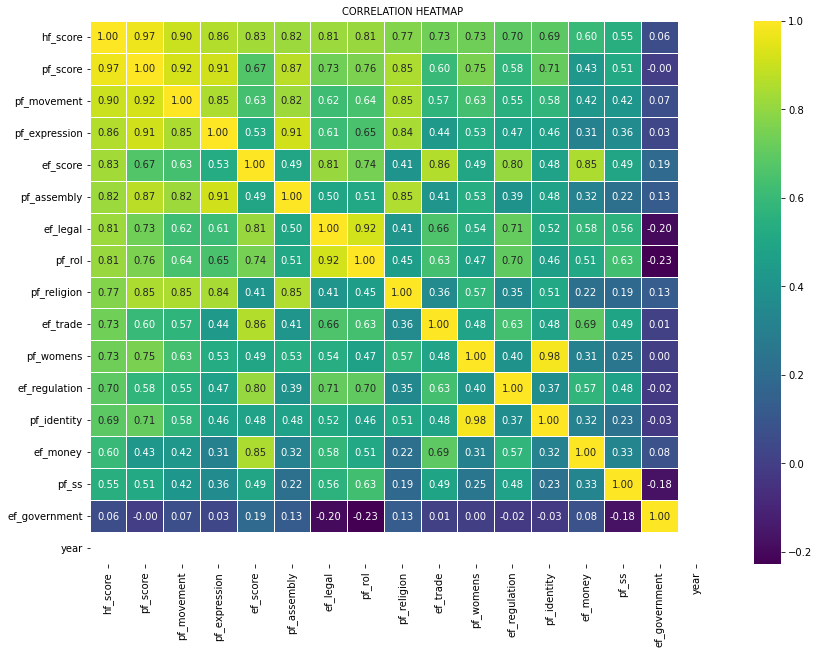

In [51]:
plt.figure(figsize=(14,10))
plt.title("CORRELATION HEATMAP",fontsize=10)
sns.heatmap(data=lean_df.corr(),cmap="viridis",annot=True, fmt='.2f', linewidths=1)
plt.show()

The size of the government have almost 0 correlation with the overall freedom index meaning that we dont need it in this study(it doesnt have linear relationship with freedom). In the graph above we can see all the significative variables that we keep in order by the highest to the lowest  corellatation with the overall freedom index.We can see that there is almost perfect linear ralitionshp between hf score and pf score, while ef is a little bit less corellated with hf.

In [52]:
lean_df.drop(columns="ef_government",  inplace=True)
lean_df["countries"] = dd2021.countries  
lean_df['region']=dd2021.region 

In [53]:
#sorting by best correlation with hs score
lean_df=lean_df.sort_values("hf_score",ascending=False)

In [54]:
lean_df.reset_index()

,index,hf_score,pf_score,pf_movement,pf_expression,ef_score,pf_assembly,ef_legal,pf_rol,pf_religion,ef_trade,pf_womens,ef_regulation,pf_identity,ef_money,pf_ss,year,countries,region
0,143,9.11,9.56,9.85,9.80,8.48,9.68,8.68,8.17,9.52,7.89,9.93,8.27,10.00,9.85,9.87,2019,Switzerland,Western Europe
1,109,9.01,9.33,9.94,9.50,8.56,9.70,8.68,7.80,9.89,8.76,9.98,8.98,10.00,9.78,8.50,2019,New Zealand,Oceania
2,42,8.98,9.56,9.86,9.23,8.17,9.77,8.61,8.80,9.50,8.77,9.97,8.54,10.00,9.60,9.75,2019,Denmark,Western Europe
3,48,8.91,9.48,9.92,9.41,8.11,9.75,7.70,7.98,9.67,8.68,9.97,8.22,10.00,9.36,9.63,2019,Estonia,Eastern Europe
4,73,8.90,9.40,9.89,9.59,8.21,9.71,7.68,7.37,9.63,8.73,9.96,8.40,10.00,9.50,9.62,2019,Ireland,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,46,4.49,3.63,5.70,3.01,5.68,3.03,3.58,3.38,3.20,6.24,1.47,5.43,0.32,7.72,6.80,2019,"Egypt, Arab Rep.",Middle East & North Africa
161,140,4.48,4.74,5.45,5.74,4.19,5.62,2.74,3.40,5.87,2.53,1.35,5.00,0.34,1.82,6.77,2019,Sudan,Sub-Saharan Africa
162,162,4.08,3.11,4.13,2.57,5.45,3.45,2.74,2.41,2.93,5.38,2.26,3.50,2.04,7.78,4.21,2019,"Yemen, Rep.",Middle East & North Africa
163,160,4.03,4.90,5.85,4.20,2.83,3.83,2.49,1.68,7.23,4.09,8.17,2.52,8.13,0.69,3.37,2019,"Venezuela, RB",Latin America & the Caribbean


<a id='the_destination11'></a>
## Top countries in increase and decrease of happiness score

In [55]:
#making top 10 countries and bot 10 countries dataframes
hf_top = lean_df.nlargest(10,"hf_score")
hf_bot = lean_df.nsmallest(10,"hf_score")
hf_top10=pd.melt(hf_top,id_vars= ['countries'] ,value_vars=['hf_score','pf_score','ef_score'])
hf_bot10=pd.melt(hf_bot,id_vars= ['countries'] ,value_vars=['hf_score','pf_score','ef_score'])

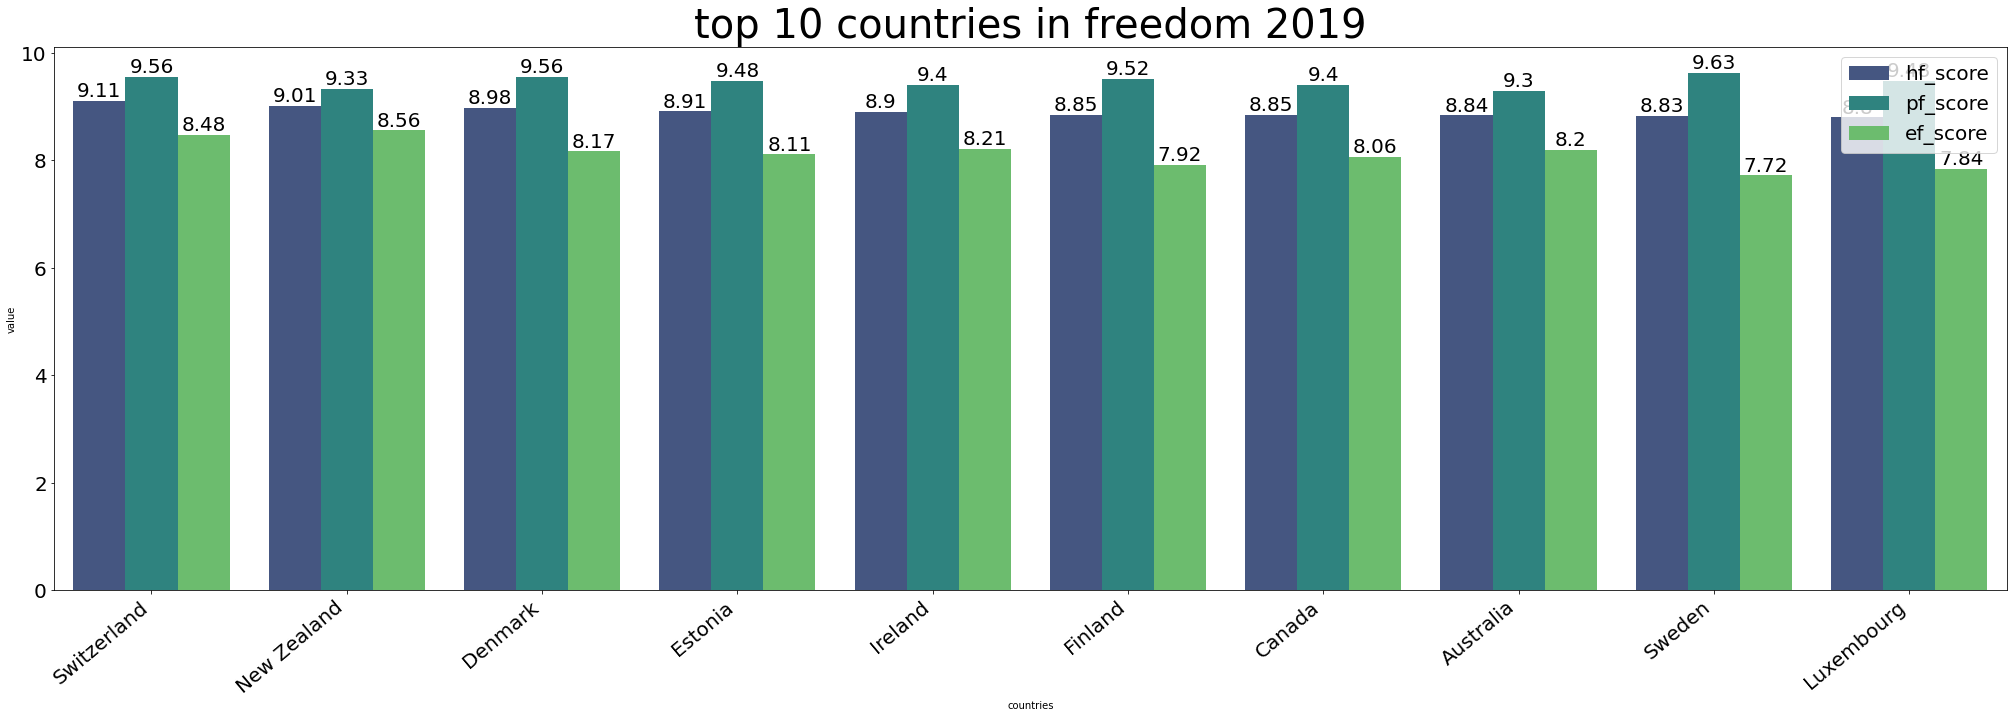

In [56]:
plt.figure(figsize = (35,10))

ax=sns.barplot(x='countries', y='value', hue='variable', data=hf_top10,palette = 'viridis')
for container in ax.containers:
    hue = hf_top10.loc[hf_top10['variable']==container.get_label()]
    ax.bar_label(container, labels= hue["value"], size=20)
plt.title("top 10 countries in freedom 2019", size=40)
plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.yticks( fontsize=20)
plt.xticks( fontsize=20)
plt.legend(fontsize=20)


plt.show()


The most free countries have tha same pattern: personal freedom is higher than economic freedom, even if they are both high

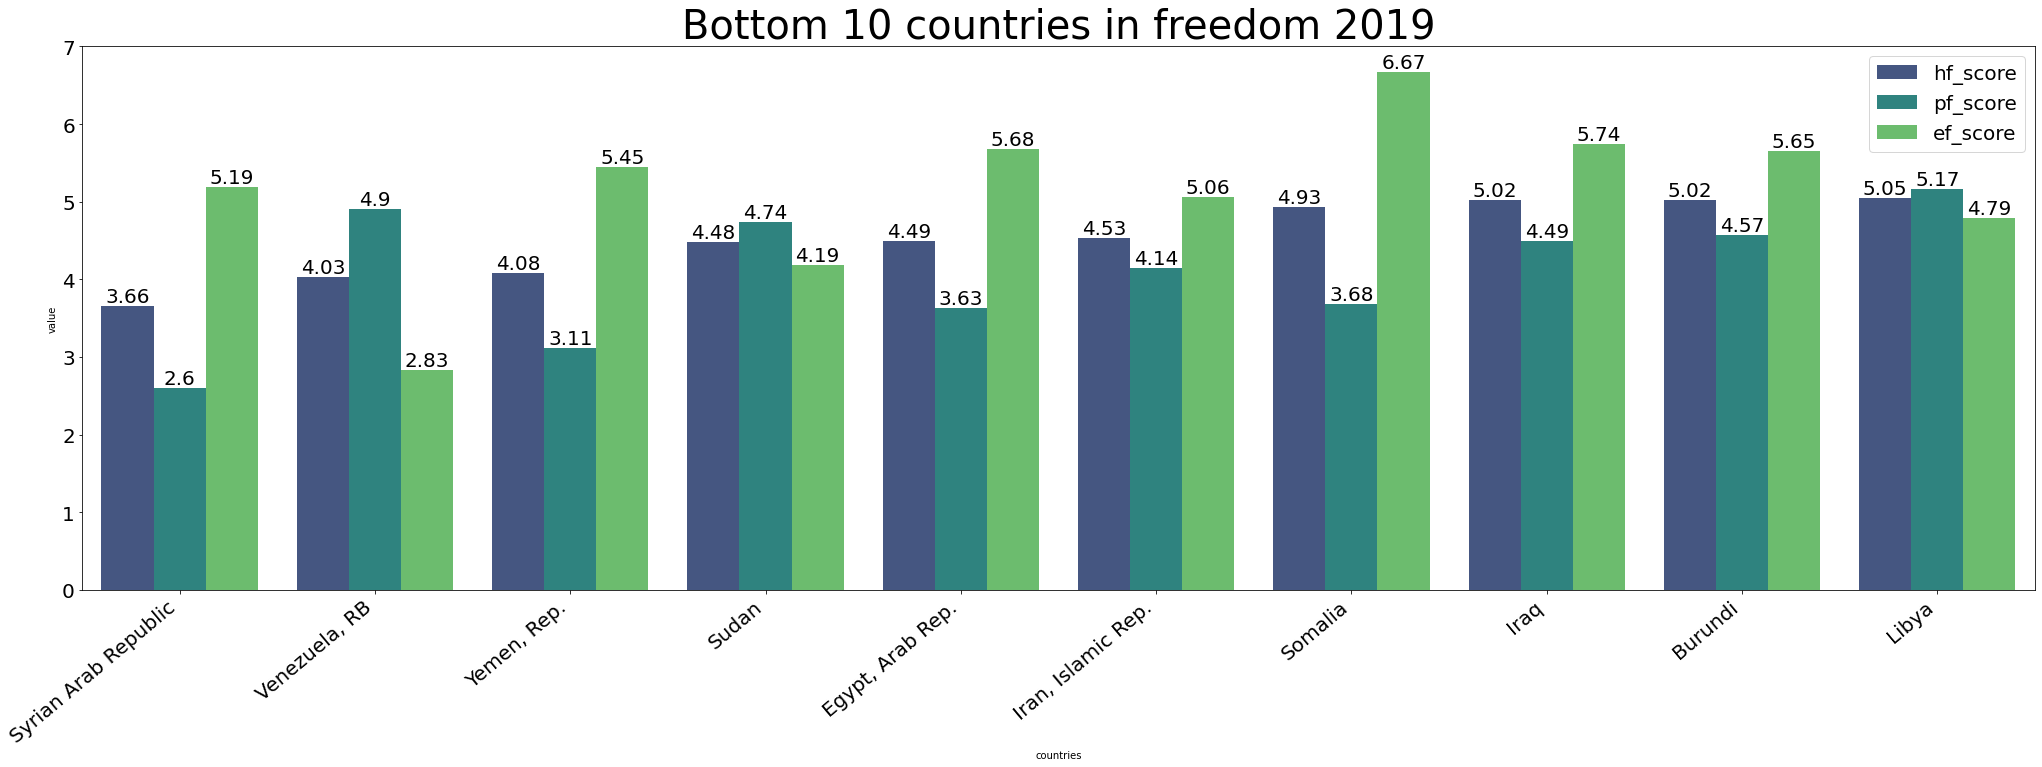

In [57]:
plt.figure(figsize = (35,10)) 

ax=sns.barplot(x='countries', y='value', hue='variable', data=hf_bot10,palette = 'viridis')
for container in ax.containers:
    huee = hf_bot10.loc[hf_top10['variable']==container.get_label()]
    ax.bar_label(container, labels= huee["value"], size=20)
plt.title("Bottom 10 countries in freedom 2019", size=40)
plt.yticks( fontsize=20)
plt.xticks( fontsize=20)
plt.legend(fontsize=20)

plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.show()

The less free countris  have the opposite pattern: a lower personal freedom score than the economic freedom score even if, as we can see, both indicators are really low in mean. It is not obvius cause as we can search in the happiness databese these countries have a really bad economy and now, we 
know , a even worse personal freedom. As we saw in the correlation heatmap, the overall freedom index is more corellated with personal freedom than the economic freedom and even if we can't just affirm a condition of cause and effect beetwen these 3 variabileas, from those two graphs it seems so.Remember the  higher correlation between personal freedom and the overall freedom index than economic freedom and the overall freedom index? Infact  the most free countries have a higher personal freedom than economic freedom at the opposite of the less frees

In [58]:
#making 2 sub_df to see the linear relationshep of pf_score and ef_score with the subvariables
pf_df=lean_df.groupby('countries')[['pf_score','pf_rol','pf_ss', 'pf_movement','pf_religion','pf_assembly',
                            'pf_expression','pf_womens','pf_identity']].mean()
iz = pf_df.corr().sort_values('pf_score', ascending=False).index
pf_df = pf_df.loc[:, iz]
ef_df=lean_df.groupby('countries')[['ef_score','ef_legal','ef_money', 'ef_trade','ef_regulation']].mean()
ic = ef_df.corr().sort_values('ef_score', ascending=False).index
ef_df = ef_df.loc[:, ic]

Text(0.5, 1.0, 'Economic Freedom Heatmap')

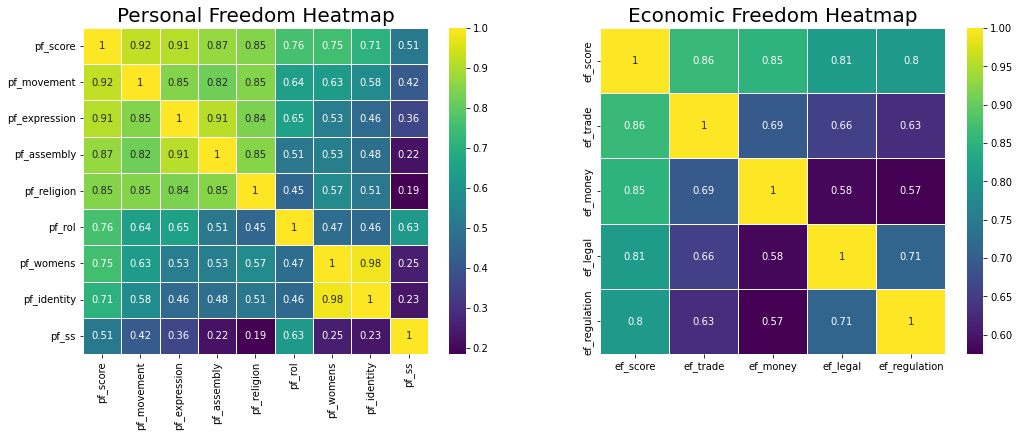

In [59]:
fig, (ax1, ax2) = plt.subplots(figsize = (17,6), ncols=2,sharey=False)

sns.heatmap(pf_df.corr(),annot=True,cmap='viridis',linewidths=1,ax=ax1)
sns.heatmap(ef_df.corr(),annot=True,cmap='viridis',linewidths=1,ax=ax2)
ax1.set_title("Personal Freedom Heatmap", size=20)
ax2.set_title("Economic Freedom Heatmap", size=20)

In [60]:
from treelib import Node, Tree
#creating a tree
tree = Tree()

tree.create_node("Overall happiness score","overall happiness score")  
tree.create_node("Personal Freedom score (0.97)","pf",parent="overall happiness score")
tree.create_node("Economic Freedom score (0.83)","ef", parent="overall happiness score")
tree.create_node("Personal Freedom movement(0.92)",parent="pf")
tree.create_node("Personal Freedom of expression(0.91)", parent="pf")
tree.create_node("Personal Freedom of association(0.87)", parent="pf")
tree.create_node("Personal Freedom religion(0.85)",parent="pf")
tree.create_node("Personal Freedom rule of law (0.76)", parent="pf") 
tree.create_node("Personal Freedom of womens(0.75)", parent="pf") 
tree.create_node("Personal Freedom identity(0.71)", parent="pf") 
tree.create_node("Personal Freedom securety and safety(0.51)", parent="pf") 
tree.create_node("economic Freedom of trading (0.86)"   , parent="ef")
tree.create_node("economic Freedom money(0.85)"   , parent="ef")
tree.create_node("economic Freedom legal(0.81)"   , parent="ef")
tree.create_node("economic Freedom regulation(0.8)"   , parent="ef")



tree.show(key=False,line_type="ascii-em")

Overall happiness score
╠══ Personal Freedom score (0.97)
║   ╠══ Personal Freedom movement(0.92)
║   ╠══ Personal Freedom of expression(0.91)
║   ╠══ Personal Freedom of association(0.87)
║   ╠══ Personal Freedom religion(0.85)
║   ╠══ Personal Freedom rule of law (0.76)
║   ╠══ Personal Freedom of womens(0.75)
║   ╠══ Personal Freedom identity(0.71)
║   ╚══ Personal Freedom securety and safety(0.51)
╚══ Economic Freedom score (0.83)
    ╠══ economic Freedom of trading (0.86)
    ╠══ economic Freedom money(0.85)
    ╠══ economic Freedom legal(0.81)
    ╚══ economic Freedom regulation(0.8)



With this lean tree we can have a better view of the linear relationship between the variables, sorted by correlation with its variable parent.Every number refers to the correlation with its  parent, so for example the 0.97 of personal freedom score is its correlation with the overall happiness score, while  the 0.92 of the personal freedom movement refers to its  linear realtionship with the personal freedom score.

<a id='the_destination12'></a>
## Geographical discrimination of freedom

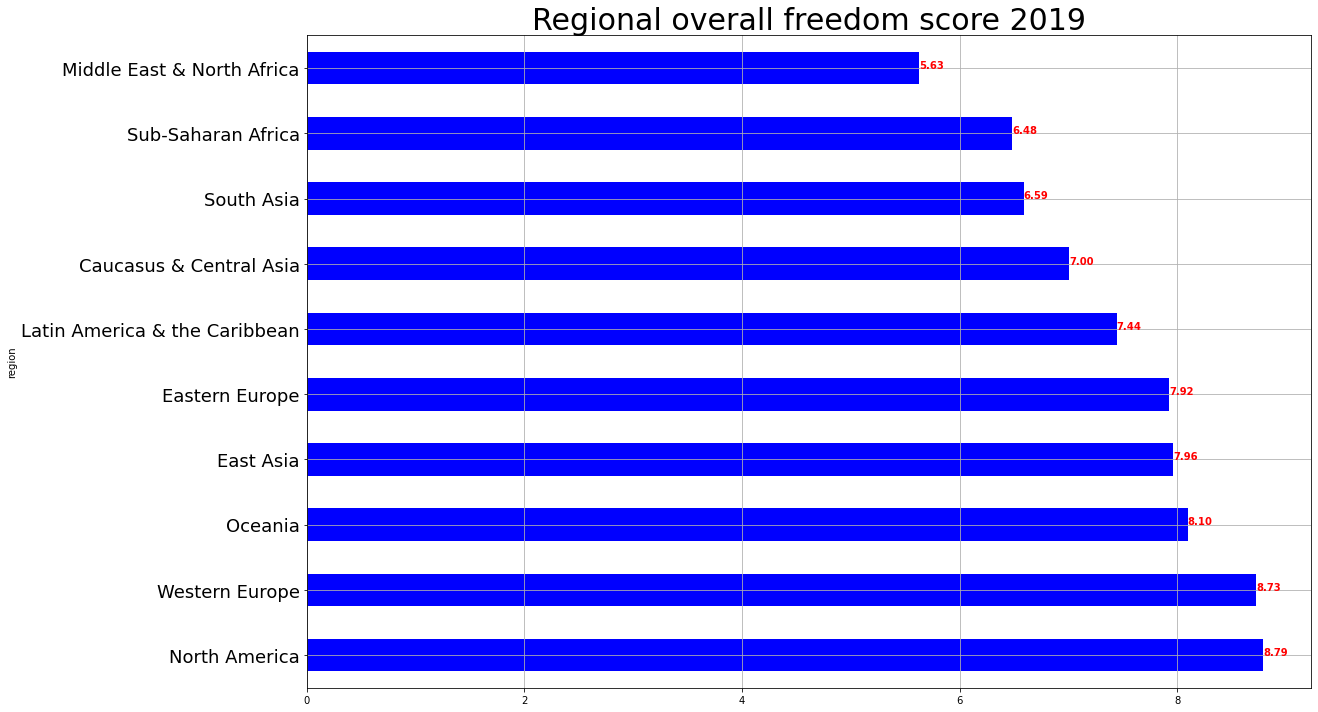

In [61]:
regional=lean_df.groupby("region")[["hf_score"]].mean()
regional = regional.apply(lambda x: x.sort_values(ascending=False))
regional.reset_index()
regional["hf_score"].plot(kind='barh',
                                 figsize=(18,12),color="blue")
for index, value in enumerate(regional["hf_score"]):
    val = '{0:.2f}'.format(value)
    plt.text(value, index,
              str(val),color="red",weight='bold')
plt.title("Regional overall freedom score 2019",fontsize=30)
plt.grid()
plt.yticks( fontsize=18)             
 
plt.show()

Frome the graph above we can have a better understanding  about who is the less free region and who is the most free. One thing that i didnt exepct was to find oceania as number 3 and not number 1.Maybe the other states bring down the index but when commonly we refear to australia the first thing we think about is freedom.

In [62]:
#making 2 df:1 for personal freedom variables, 1 for economics
lean_pf=lean_df.groupby("region")[['pf_score','pf_movement','pf_expression',
'pf_assembly','pf_rol','pf_religion', 'pf_womens','pf_identity','pf_ss']].mean()
lean_pf = lean_pf.apply(lambda x: x.sort_values(ascending=False))
lean_pf=lean_pf.reset_index()
lean_pf=lean_pf.sort_values('pf_score')

lean_ef=lean_df.groupby("region")[['ef_score','ef_legal','ef_trade',
'ef_regulation','ef_money']].mean()
lean_ef = lean_ef.apply(lambda x: x.sort_values(ascending=False))
lean_ef=lean_ef.reset_index()
lean_ef=lean_ef.sort_values('ef_score')




In [63]:
#melting to do  barplots 
regional_pf=pd.melt(lean_pf,id_vars= ['region'] ,value_vars=['pf_score','pf_movement','pf_expression',
'pf_assembly','pf_rol','pf_religion', 'pf_womens','pf_identity','pf_ss'])
regional_pf=regional_pf.round(decimals=2).reset_index(drop=True) 
regional_ef=pd.melt(lean_ef,id_vars= ['region'] ,value_vars=[ 'ef_score','ef_legal','ef_trade',
'ef_regulation','ef_money'])
regional_ef=regional_ef.round(decimals=2) 

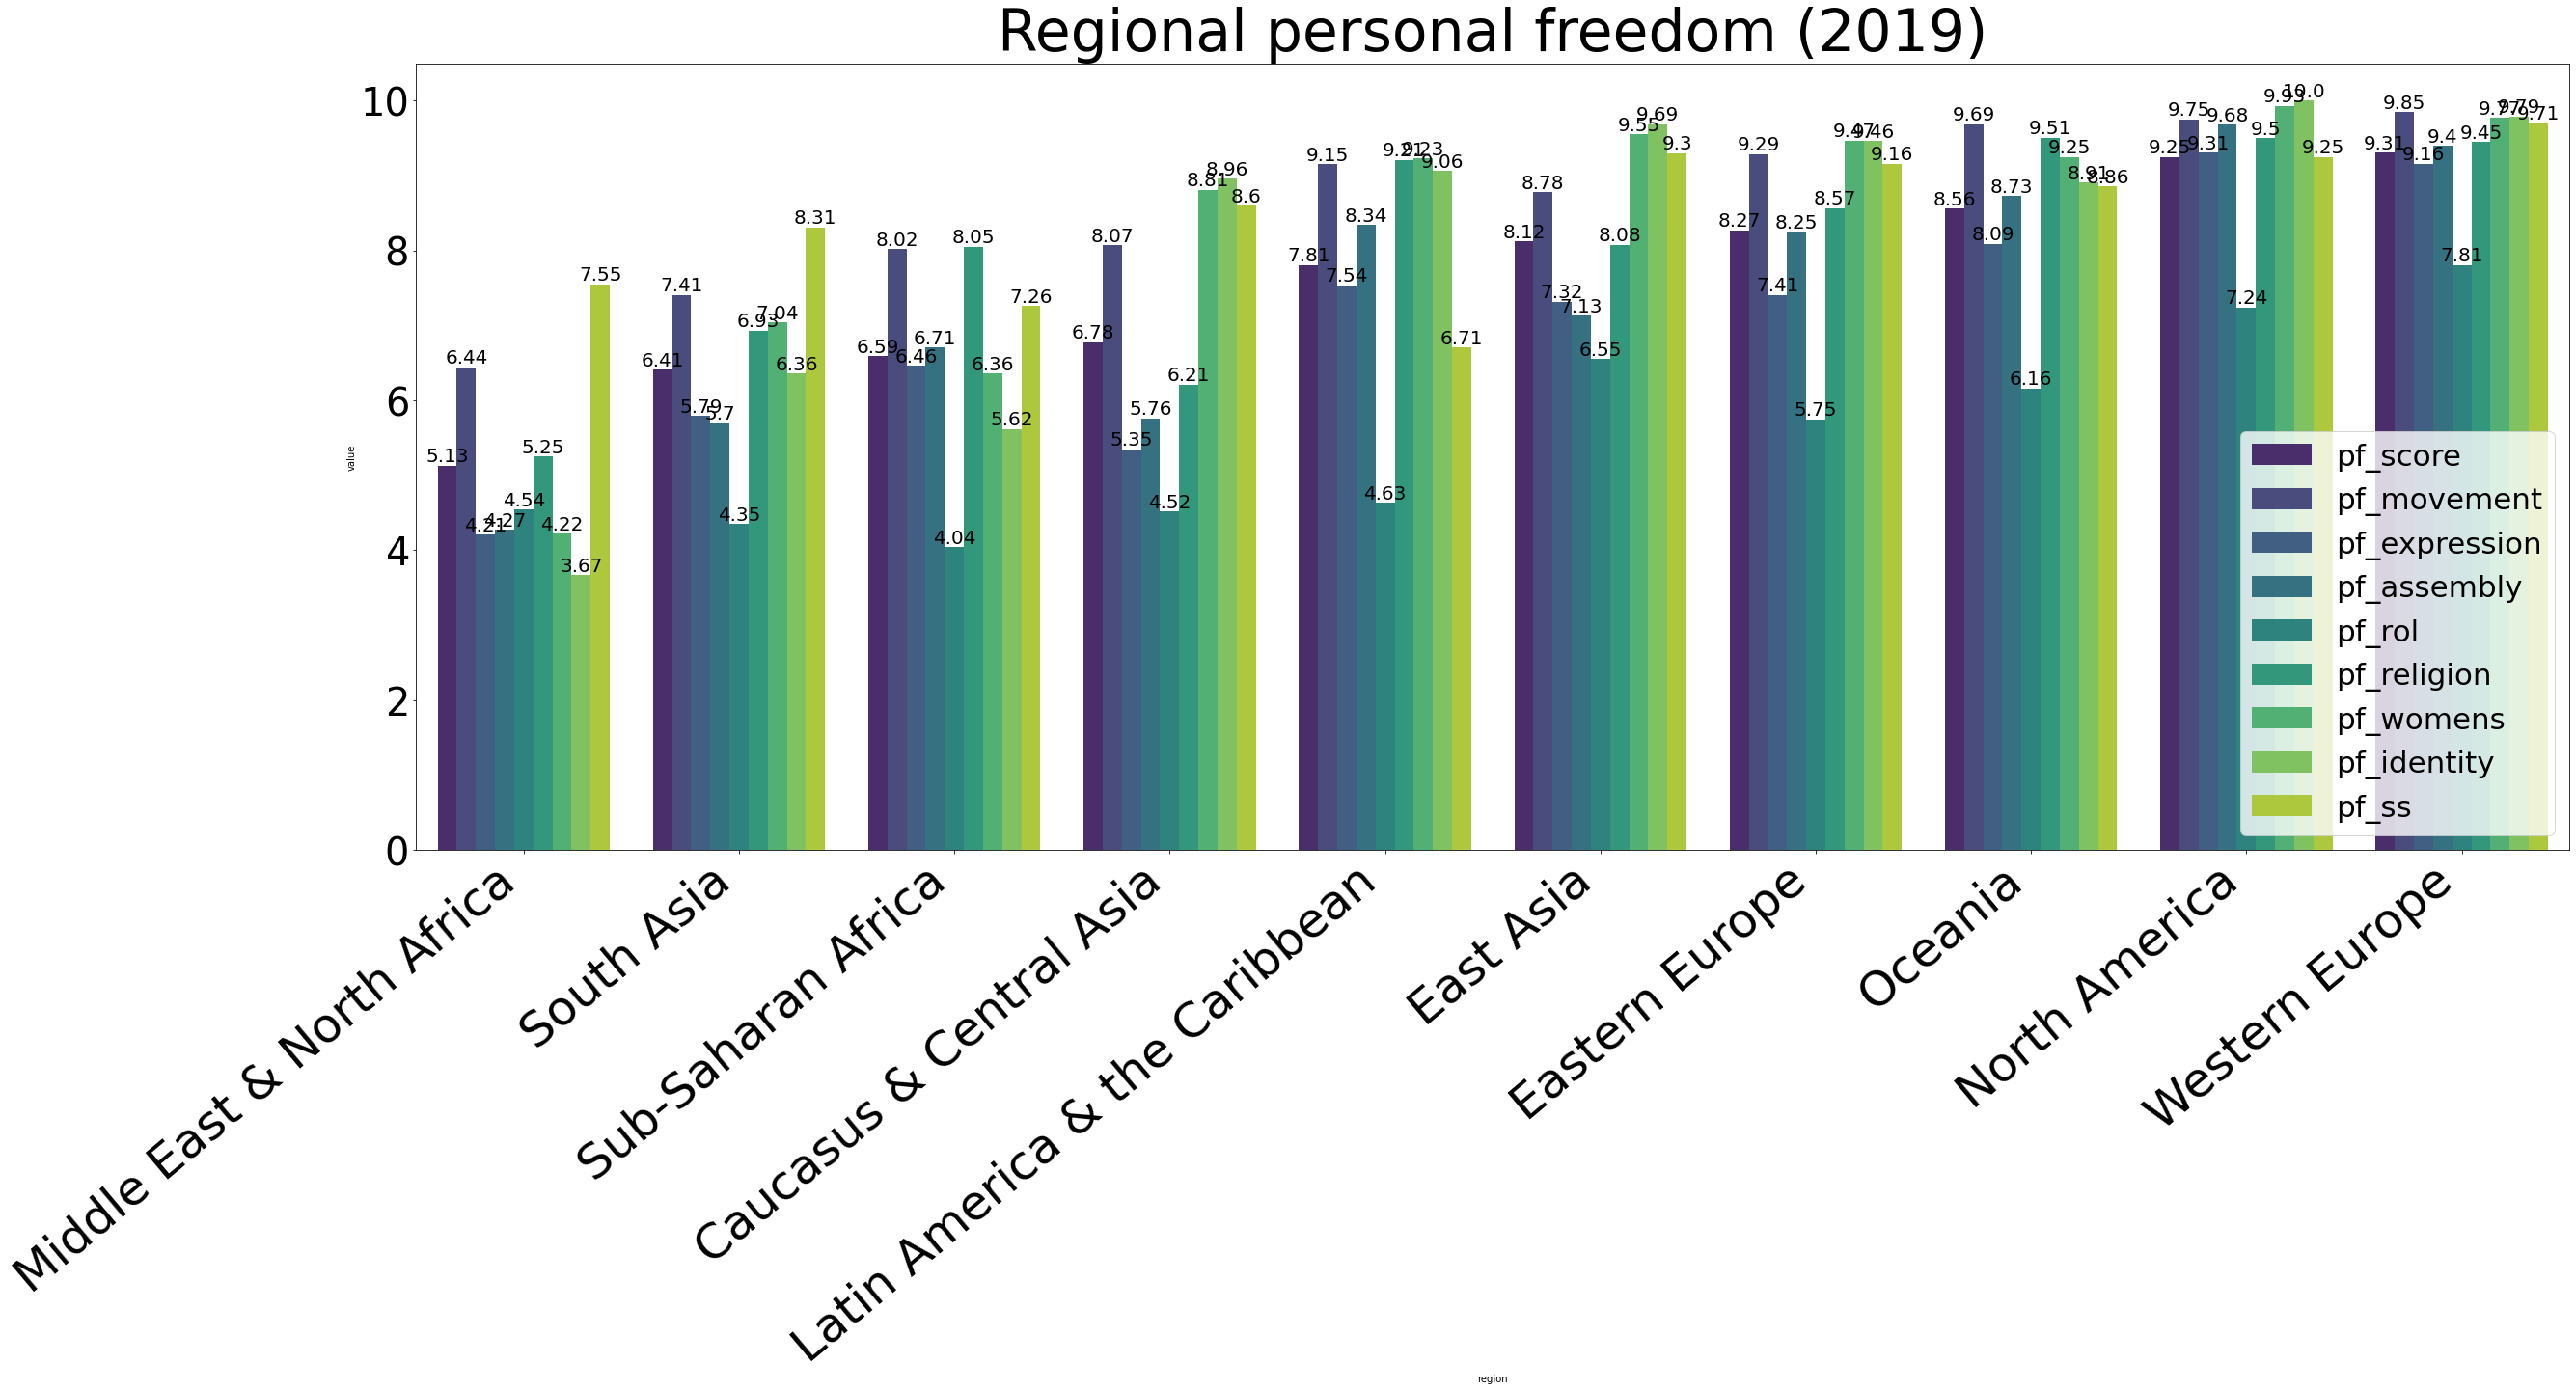

In [64]:
plt.figure(figsize = (40,15))
ax=sns.barplot(x='region', y='value', hue='variable', data=regional_pf, palette="viridis")

for container in ax.containers:
    regional_hue = regional_pf.loc[regional_pf['variable']==container.get_label()]
    ax.bar_label(container, labels= regional_hue["value"], size=20)
    
plt.title("Regional personal freedom (2019)", size=60)
plt.yticks( fontsize=40)
plt.xticks( fontsize=50)
plt.legend(loc = 'lower right', fontsize = '31', title_fontsize = '20')
plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.show()








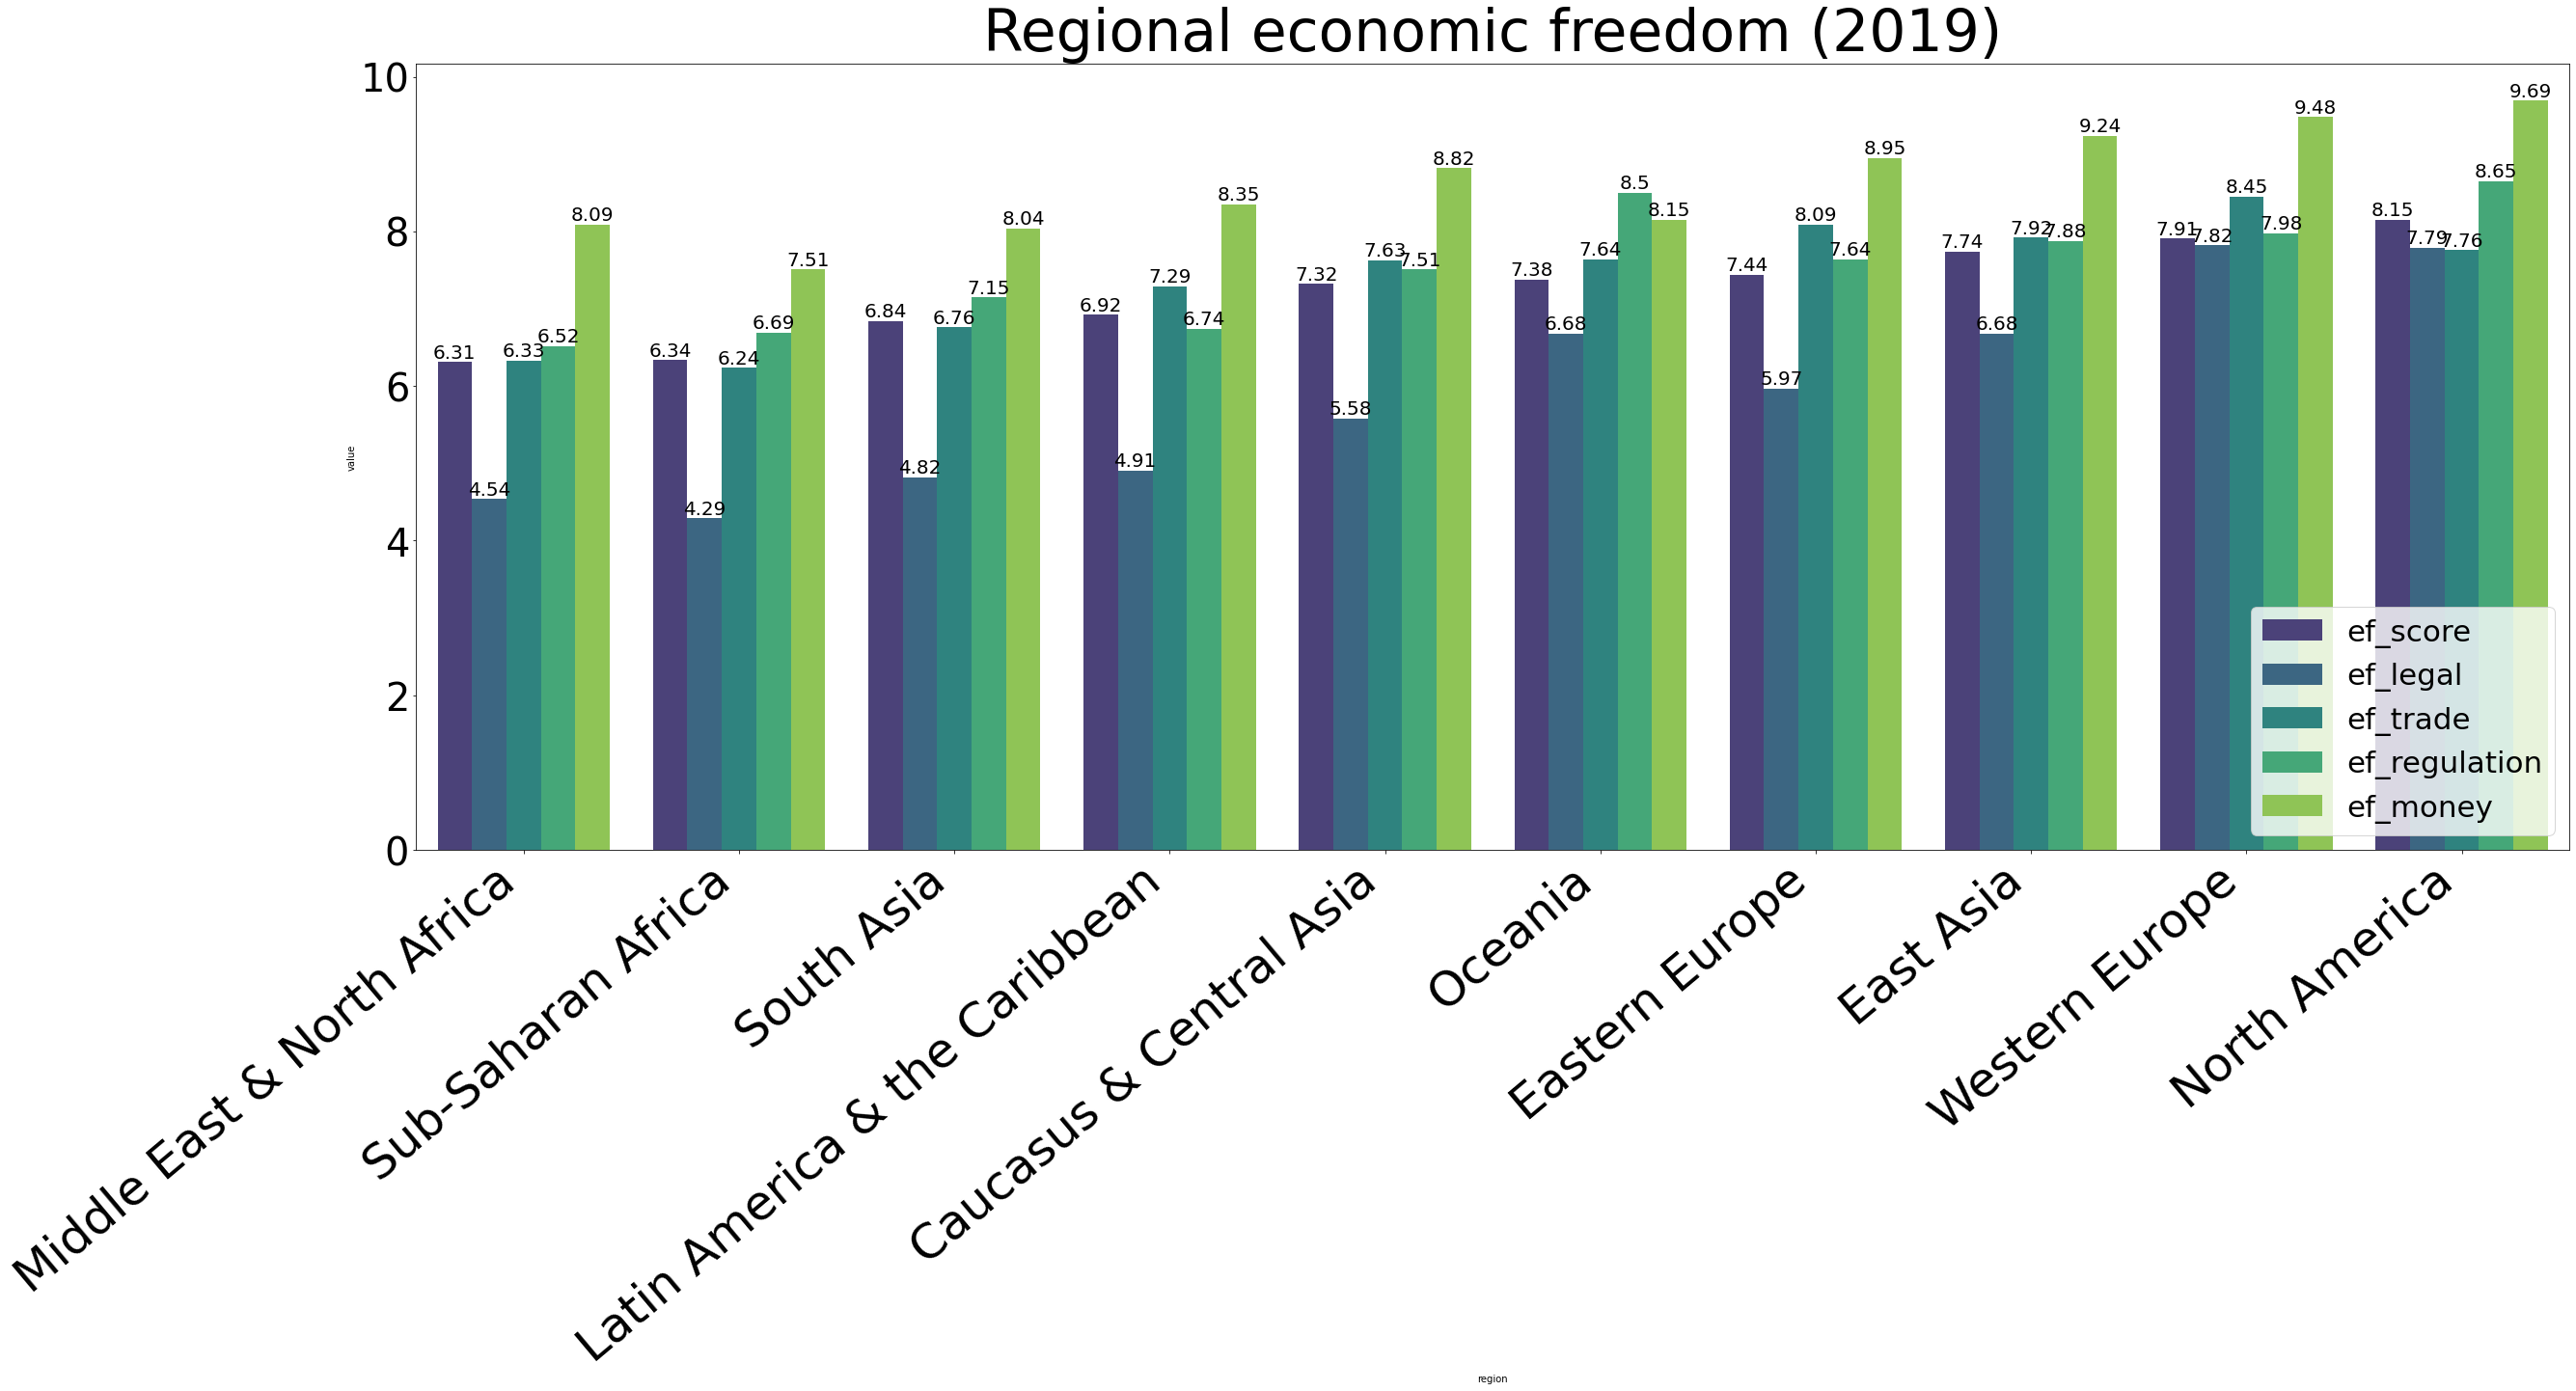

In [65]:
plt.figure(figsize = (40,15))
ax=sns.barplot(x='region', y='value', hue='variable', data=regional_ef, palette="viridis")

for container in ax.containers:
    regional_hue = regional_ef.loc[regional_ef['variable']==container.get_label()]
    ax.bar_label(container, labels= regional_hue["value"], size=20)
    
plt.title("Regional economic freedom (2019)", size=60)
plt.yticks( fontsize=40)
plt.xticks( fontsize=50)
plt.legend(loc = 'lower right', fontsize = '31', title_fontsize = '20')
plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.show()




Without any model to apply to the datas we just can have a better view about the most significative variables in every country and for example note that in the last graph(economic freedom),the big difference between the 2 best regions and the others is the liberty  to trade. In the first graph (personal freedom) we can see that the variable that is perceived most negatively concerns laws.